In [1]:
# !pip install tensorflow[and-cuda]
# !pip uninstall tensorflow
# !pip install tensorflow==2.15
# !pip install scikit-learn
# !pip install matplotlib
# !pip install pandas
# !pip install tqdm
# !pip install SimpleITK
# !pip install numpy==1.23.5

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, roc_curve, recall_score, balanced_accuracy_score, auc, precision_score,precision_recall_curve
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
from tqdm import tqdm
from CUBS_Dataset import read_cubs_images
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier
# from imblearn.over_sampling import ADASYN
from Dataset import read_dataset
from scipy import stats
from collections import Counter
import pickle
from matplotlib.ticker import FuncFormatter
# from typing import Optional, List
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
# os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
# import os
# import numpy as np
# os.environ['TF_DETERMINISTIC_OPS'] = '1'
# # os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
# # os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='cuda_malloc_async'
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Dropout, Lambda, GlobalMaxPooling2D, Flatten
# from tensorflow.keras.metrics import Precision, Recall, AUC
# from keras.backend import clear_session
# from keras.regularizers import l2
# from keras.callbacks import  EarlyStopping, ReduceLROnPlateau #Callback, 
# # from PIL import Image
# # import numpy as np
# from sklearn.model_selection import train_test_split, StratifiedKFold
# import keras.applications
# # from keras import Sequential
# # from keras.models import Model, load_model
# # from keras.layers import GlobalMaxPooling2D, Dense, Rescaling, Input, Dropout, Lambda, RandomCrop, RandomFlip, RandomTranslation, RandomRotation, RandomZoom, TimeDistributed, Maximum
# # from keras.regularizers ionlymport l2
# # from keras.backend import clear_session
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.optimizers import Adam
# import tensorflow as tf
# # from keras.metrics import AUC, PrecisionAtRecall, SensitivityAtSpecificity, SpecificityAtSensitivity, Metric
# # from Dataset import read_dataset
# # from scikeras.wrappers import KerasClassifier
# from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score #make_scorer, 
# # from tensorflow.image import grayscale_to_rgb
# # import itertools
# # from sklearn.model_selection import StratifiedKFold
# # import ast
# import matplotlib.pyplot as plt
# import random
# from numpy.random import seed, randint
# from utils import MinMax #grid_search, create_model, simple_kfold
# from tensorflow.keras.utils import set_random_seed
# from keras.losses import BinaryFocalCrossentropy
# import seaborn as sns
# # from tensorflow.keras import mixed_precision

2024-11-01 16:53:30.281113: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 16:53:30.330655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 16:53:30.330737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 16:53:30.332283: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 16:53:30.341654: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# def set_memory_limit(
#         memory_limit: Optional[int] = None,
# ):
#     gpus: List[tf.config.PhysicalDevice] = tf.config.list_physical_devices('GPU')
#     if not gpus:
#         return

#     _current: tf.config.PhysicalDevice = None
#     try:
#         for index, gpu in enumerate(gpus):
#             _current = gpu

#             # Set memory limit
#             print(f"setting memory_limit: index:[{index}] gpu:{gpu}")
#             tf.config.set_logical_device_configuration(
#                 device=gpu,
#                 logical_devices=[
#                     tf.config.LogicalDeviceConfiguration(memory_limit=memory_limit)
#                 ]
#             )
#             logical_gpus = tf.config.list_logical_devices('GPU')
#     except RuntimeError as err:
#         print(f"Memory growth must be set before GPU [{_current}] have been initialized")
#         raise err
#     except ValueError as err:
#         print(f"Invalid GPU device [{_current}]")
#         raise err

In [4]:
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.config.experimental.enable_op_determinism()
kseed=0
np.random.seed(kseed)
random.seed(kseed)
tf.random.set_seed(kseed)
tf.keras.utils.set_random_seed(kseed)
tqdm.pandas()
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))
# set_memory_limit(5*1024)

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-30 19:36:12.200043: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-30 19:36:12.224609: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-30 19:36:12.227889: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
cubs = pd.read_csv(os.path.join('CUBS', 'ClinicalDatabase-CUBS.csv'), sep=';')
cubs.drop('Sex', axis=1, inplace=True)
cubs.rename({'Unnamed: 0': 'hospital', 'Sex.1': 'Sex'}, axis=1, inplace=True)
cubs.hospital = cubs.hospital.ffill()
cubs[['BMI', 'Glucose', 'Tchol', 'HDL', 'LDL', 'Trigl', 'Creat', 'Apoa1', 'ApoB']] = cubs[['BMI', 'Glucose', 'Tchol', 'HDL', 'LDL', 'Trigl', 'Creat', 'Apoa1', 'ApoB']].map(lambda x: float(x.replace(',', '.')) if type(x)==str else x, na_action='ignore')

cubs = cubs[cubs['Base CVE'].notna() & cubs['FUPEvents'].notna()]
cubs['risk'] = ((cubs['Base CVE']==1) | (cubs['FUPEvents']==1))*1
cubs.loc[(cubs['Base CVE']==0) & (cubs['FUPEvents']==1), 'risk'] = (cubs[(cubs['Base CVE']==0) & (cubs['FUPEvents']==1)].TimetoEvent<=3)*1
cubs['image'] = cubs.progress_apply(read_cubs_images, axis=1)
cubs.drop('image', axis=1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 689/689 [00:02<00:00, 242.18it/s]


,hospital,Patient ID,age,Sex,CVD Symptoms,packyears,smoking,Hypertension,Diabetes,BMI,...,HDL,LDL,Trigl,Creat,Apoa1,ApoB,Base CVE,FUPEvents,TimetoEvent,risk
0,Nicolaides - Cyprus,clin_0001,65.0,1.0,1,30,1.0,0.0,0.0,33.0,...,26.0,96.0,125.0,0.98,1.13,0.88,0.0,0.0,6.0,0
1,Nicolaides - Cyprus,clin_0002,59.0,0.0,0,0,0.0,0.0,0.0,30.0,...,62.0,207.0,94.0,0.89,1.86,1.41,0.0,0.0,14.0,0
2,Nicolaides - Cyprus,clin_0003,66.0,1.0,0,40,1.0,1.0,0.0,33.9,...,47.0,175.0,166.0,1.17,1.45,1.60,0.0,1.0,10.0,0
3,Nicolaides - Cyprus,clin_0004,65.0,0.0,0,0,0.0,1.0,0.0,27.2,...,32.0,114.0,276.0,0.79,1.13,0.99,0.0,0.0,14.0,0
4,Nicolaides - Cyprus,clin_0005,68.0,1.0,0,60,1.0,0.0,0.0,24.9,...,53.0,164.0,191.0,0.78,1.53,1.50,0.0,0.0,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Nicolaides - Cyprus,clin_0690,48.0,0.0,0,0,0.0,0.0,0.0,22.9,...,64.0,117.0,63.0,0.72,1.58,0.91,0.0,0.0,11.0,0
690,Nicolaides - Cyprus,clin_0691,53.0,1.0,0,0,0.0,0.0,0.0,28.4,...,50.0,126.0,123.0,0.95,1.47,1.02,0.0,0.0,11.0,0
691,Nicolaides - Cyprus,clin_0692,45.0,0.0,0,"6,25",1.0,0.0,0.0,24.4,...,49.0,173.0,170.0,0.82,1.51,1.46,0.0,0.0,11.0,0
692,Nicolaides - Cyprus,clin_0693,41.0,0.0,0,0,0.0,0.0,0.0,23.1,...,58.0,126.0,72.0,0.75,1.50,0.98,0.0,0.0,11.0,0


In [6]:
# Prepare the image data and labels
X = np.stack(cubs.image.values)
# X = X.reshape(-1, X.shape[2], X.shape[3], X.shape[4])

y = cubs.risk.values
# y = np.repeat(y, 2)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
X_train_ind, X_test_ind, y_train, y_test = train_test_split(np.arange(len(X)), y, test_size=0.4, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)
# X_valid_ind, X_test_ind, y_valid, y_test = train_test_split(X_test_ind, y_test, test_size=0.5, stratify=y_test)
X_test_ind, X_valid_ind, y_test, y_valid = train_test_split(X_test_ind, y_test, test_size=0.5, stratify=y_test)

# X_train = X[X_train_ind]
# X_train = X_train.reshape(-1, X_train.shape[2], X_train.shape[3], X_train.shape[4])
# y_train = np.repeat(y_train, 2)

# X_valid = X[X_valid_ind]
# X_valid = X_valid.reshape(-1, X_valid.shape[2], X_valid.shape[3], X_valid.shape[4])
# y_valid = np.repeat(y_valid, 2)

# X_test = X[X_test_ind]
# X_test = X_test.reshape(-1, X_test.shape[2], X_test.shape[3], X_test.shape[4])
# y_test = np.repeat(y_test, 2)

X = X.reshape(-1, X.shape[2], X.shape[3], X.shape[4])
y = np.repeat(y, 2)

temp = np.zeros(2*len(X_train_ind))
temp[::2, ...]=X_train_ind*2
temp[1::2, ...]=X_train_ind*2+1
X_train_ind = temp.astype(int)

temp = np.zeros(2*len(X_valid_ind))
temp[::2, ...]=X_valid_ind*2
temp[1::2, ...]=X_valid_ind*2+1
X_valid_ind = temp.astype(int)

temp = np.zeros(2*len(X_test_ind))
temp[::2, ...]=X_test_ind*2
temp[1::2, ...]=X_test_ind*2+1
X_test_ind = temp.astype(int)

X_train = X[X_train_ind]
y_train = np.repeat(y_train, 2)

X_valid = X[X_valid_ind]
y_valid = np.repeat(y_valid, 2)

X_test = X[X_test_ind]
y_test = np.repeat(y_test, 2)

print(np.mean(y_train), np.mean(y_valid), np.mean(y_test))
# print(np.mean(y_train), np.mean(y_test))

0.1694915254237288 0.17391304347826086 0.16666666666666666


In [7]:
cubs.risk.value_counts()

risk
0    572
1    117
Name: count, dtype: int64

In [8]:
carotid_list = read_dataset()

# from tqdm import tqdm
# for i in tqdm(carotid_list):
#     i.video = i.crop_plaque()

carotid_df = pd.DataFrame.from_records([i.__dict__ for i in carotid_list])
carotid_df = carotid_df[~carotid_df.risk.isna()]

q = carotid_df[(carotid_df.lastframe - carotid_df.frame1 + 1)!=carotid_df.x_wp.apply(len)]
print(pd.concat([q[['frame1', 'lastframe']], q.x_wp.apply(len), q.video.apply(lambda x: x.shape)], axis=1))

for i in carotid_list:
    i.x_wp = i.x_wp[:i.lastframe - i.frame1 + 1]
    i.y_wp = i.y_wp[:i.lastframe - i.frame1 + 1]

carotid_df = pd.DataFrame.from_records([i.__dict__ for i in carotid_list])
print('Initial Dataframe:')
print(carotid_df.risk.value_counts(dropna=False))

carotid_df = carotid_df[~carotid_df.risk.isna()]
print('\nAfter droping unlabeled:')
print(carotid_df.risk.value_counts(dropna=False))

q = carotid_df[(carotid_df.lastframe - carotid_df.frame1 + 1)!=carotid_df.x_wp.apply(len)]
print(pd.concat([q[['frame1', 'lastframe']], q.x_wp.apply(len), q.video.apply(lambda x: x.shape)], axis=1))

def select_random_frame(x):
    return np.repeat(x[np.random.randint(x.shape[0])][..., np.newaxis], 3, axis=-1)

carotid_df['image'] = carotid_df.video.apply(select_random_frame)

# temp_df = carotid_df.drop_duplicates('patientID')[['patientID', 'risk']]

# train, test = train_test_split(temp_df, test_size=0.2, random_state=kseed)

# train, valid = train_test_split(train, test_size=0.25, random_state=kseed)

# train, valid, test = carotid_df[carotid_df.patientID.isin(train.patientID)], carotid_df[carotid_df.patientID.isin(valid.patientID)], carotid_df[carotid_df.patientID.isin(test.patientID)], 


# X_train = np.stack(train.image.values)
# y_train = train.risk.values

# X_valid = np.stack(valid.image.values)
# y_valid = valid.risk.values

# X_test = np.stack(test.image.values)
# y_test = test.risk.values

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [01:14<00:00,  1.29it/s]

    frame1  lastframe  x_wp            video
4        1         69   321   (69, 434, 532)
10     169        232   266  (321, 434, 532)
11     160        256   102  (256, 434, 532)
16      45        100   102  (100, 434, 532)
17       1         63   333   (63, 434, 532)
18       1         79   321   (79, 434, 532)
23     115        172   321  (172, 434, 532)
25       1        171   333  (171, 434, 532)
30      45        142   333  (142, 434, 532)
34       1         75   321   (75, 434, 532)
48       1         89   333   (89, 434, 532)
54       1         91   102   (91, 434, 532)
59      54        110   102  (176, 434, 532)
60     108        321   321  (321, 434, 532)
69       1         71   321   (71, 434, 532)
71       1         96   321   (96, 434, 532)
76      78        120   321  (159, 434, 532)
87       1         89   321   (89, 434, 532)
92     100        170   102  (247, 434, 532)
Initial Dataframe:
risk
1.0    67
0.0    20
NaN     9
Name: count, dtype: int64

After droping unlab

In [9]:
def create_feature_extractor(pooling='max', lr=0.001):
    """
    This function creates a ResNet50 model.

    Parameters:
    pooling (str): the type of global pooling to be applied, default is 'max'
    lr (float): learning rate, default is 0.001

    Returns:
    model (tf.keras.models.Model): the compiled model
    """
    tf.keras.backend.clear_session()

    i = tf.keras.layers.Input([None, None, 3], dtype="uint8")
    x = tf.keras.layers.Lambda(lambda x: tf.cast(x, "float32"))(i)
    preprocess_input = tf.keras.applications.inception_v3.preprocess_input(x)

    #load a specified pre-trained model
    pretrained_model = tf.keras.applications.InceptionV3(include_top=False, pooling=pooling, weights='imagenet', input_tensor=preprocess_input)
    #freeze the weights of the pre-trained layers
    for layer in pretrained_model.layers:
        layer.trainable = False
    #add the pre-trained model and custom classifier to the new model
    x = pretrained_model.output
    model = tf.keras.models.Model(i, outputs=pretrained_model.output)
    # model.summary()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='CategoricalCrossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.AUC(multi_label=True, num_labels=2, label_weights=[0, 1], name='auc'),
                           tf.keras.metrics.AUC(multi_label=True, num_labels=2, label_weights=[0, 1], curve='PR', name='auprc')]
                  )
    return model


def create_model(neurons, dropout_rate, lr, kreg, breg):
    """
    This function creates a ResNet50 model.

    Parameters:
    pooling (str): the type of global pooling to be applied, default is 'max'
    lr (float): learning rate, default is 0.001

    Returns:
    model (tf.keras.models.Model): the compiled model
    """
    tf.keras.backend.clear_session()

    i = tf.keras.layers.Input([2048], dtype="float32")
    x = i
    for n in neurons:
        x = tf.keras.layers.Dense(n, activation='relu', kernel_regularizer=kreg,
                                  bias_regularizer=breg)(x)
        if dropout_rate:
            x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense(2, kernel_regularizer=kreg, bias_regularizer=breg)(x)
    out = tf.keras.activations.softmax(x)
    model = tf.keras.models.Model(i, outputs=out)
    model.load_weights('BHI/model.weights.h5')
    # model.summary()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='CategoricalCrossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.AUC(multi_label=True, num_labels=2, label_weights=[0, 1], name='auc'),
                           tf.keras.metrics.AUC(multi_label=True, num_labels=2, label_weights=[0, 1], curve='PR', name='auprc')]
                  )
    return model

In [10]:
feature_extractor = create_feature_extractor()
X_train=feature_extractor.predict(X_train)
X_valid=feature_extractor.predict(X_valid)
X_test=feature_extractor.predict(X_test)
X_attikon = feature_extractor.predict(np.stack(carotid_df.image.values))

# # adasyn = ADASYN(n_neighbors=5, random_state=42)
# # X_train, y_train = adasyn.fit_resample(X_train, y_train)

# y_train_one = tf.keras.utils.to_categorical(y_train)
# y_val_one = tf.keras.utils.to_categorical(y_valid)

model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)

2024-10-30 19:37:30.755740: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-30 19:37:30.761235: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-30 19:37:30.768501: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

3/3 [==============================] - 1s 198ms/step


In [11]:
# dropout 0.05
# even more (2,2) regularization, 512
# class weight

y_pred = model.predict(X_test)

_, _, thresholds = roc_curve(y_test, y_pred[:, 1])
acc = [balanced_accuracy_score(y_test, (y_pred[:, 1] > thrs) * 1) for thrs in thresholds]

thr = max(zip(acc, thresholds), key=lambda x: x[0])[1]

y_pred_labels = (y_pred[:,1] > thr) * 1

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_labels)
roc_auc = roc_auc_score(y_test, y_pred[:, 1])
f1 = f1_score(y_test, y_pred_labels)
confusion = confusion_matrix(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
specificity = recall_score(y_test, y_pred_labels, pos_label=0)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_labels)

print("Confusion Matrix:")
print(confusion)

print("Accuracy: ", accuracy)
print("Sensitivity: ", recall)
print("Specificity: ", specificity)
print("Balanced accuracy: ", balanced_accuracy)
print("ROC AUC: ", roc_auc)
print("F1 Score: ", f1)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])

# Calculate trapezoidal approximation for AUC under PR curve
auc_prc = auc(recall, precision)

print(f"AUC under Precision-Recall Curve: {auc_prc:.4f}")

9/9 [==============================] - 0s 785us/step
Confusion Matrix:
[[142  88]
 [ 16  30]]
Accuracy:  0.6231884057971014
Sensitivity:  0.6521739130434783
Specificity:  0.6173913043478261
Balanced accuracy:  0.6347826086956522
ROC AUC:  0.6842155009451796
F1 Score:  0.36585365853658536
AUC under Precision-Recall Curve: 0.3128


In [ ]:
# dropout 0.05
# even more (2,2) regularization, 512
# class weight

y_pred_attikon = model.predict(X_attikon)

# _, _, thresholds = roc_curve(carotid_df.risk.values, y_pred_attikon[:, 1])
# acc = [balanced_accuracy_score(carotid_df.risk.values, (y_pred_attikon[:, 1] > thrs) * 1) for thrs in thresholds]

# thr = max(zip(acc, thresholds), key=lambda x: x[0])[1]

y_pred_labels_attikon = (y_pred_attikon[:,1] > 0.5) * 1

# Calculate metrics
accuracy = accuracy_score(carotid_df.risk.values, y_pred_labels_attikon)
roc_auc = roc_auc_score(carotid_df.risk.values, y_pred_attikon[:, 1])
f1 = f1_score(carotid_df.risk.values, y_pred_labels_attikon)
confusion = confusion_matrix(carotid_df.risk.values, y_pred_labels_attikon)
recall = recall_score(carotid_df.risk.values, y_pred_labels_attikon)
specificity = recall_score(carotid_df.risk.values, y_pred_labels_attikon, pos_label=0)
balanced_accuracy = balanced_accuracy_score(carotid_df.risk.values, y_pred_labels_attikon)

print("Confusion Matrix:")
print(confusion)

print("Accuracy: ", accuracy)
print("Sensitivity: ", recall)
print("Specificity: ", specificity)
print("Balanced accuracy: ", balanced_accuracy)
print("ROC AUC: ", roc_auc)
print("F1 Score: ", f1)

precision, recall, thresholds = precision_recall_curve(carotid_df.risk.values, y_pred_attikon[:, 1])

# Calculate trapezoidal approximation for AUC under PR curve
auc_prc = auc(recall, precision)

print(f"AUC under Precision-Recall Curve: {auc_prc:.4f}")

In [ ]:
# pred_cor = dict()
# pred_mis = dict()
# pred_cor_attikon = dict()
# pred_mis_attikon = dict()
# for j in tqdm(range(10, 500, 10)):
#     pred = np.zeros((len(X_test) + len(X_attikon), j))
#     # model = create_dropout_model(neurons=[1024, 256], dropout_rate=(0.05 + dr*0.05), lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-3, l2=1e-3), breg=None, model=model, summary=False)
#     for i in range(j):
#         pred[:,i] = model(np.vstack([X_test, X_attikon]), training=True).numpy()[:, 1]
    
#     pred, pred_attikon = pred[:-len(carotid_df)], pred[-len(carotid_df):]
#     # pred = pred.std(axis=1)/(pred.std(axis=1).max())
#     pred_cor[j] = pred[(y_test==y_pred_labels), :]
#     pred_mis[j] = pred[(y_test!=y_pred_labels), :]
    
#     # pred_attikon = pred_attikon.std(axis=1)/(pred_attikon.std(axis=1).max())
#     pred_cor_attikon[j] = pred_attikon[(carotid_df.risk.values==y_pred_labels_attikon), :]
#     pred_mis_attikon[j] = pred_attikon[(carotid_df.risk.values!=y_pred_labels_attikon), :]

In [ ]:
def standard_deviation(arr):
  """
  This function calculates the standard deviation of a 1D array.

  Args:
      arr: A 1D numpy array.

  Returns:
      The standard deviation of the array, or np.nan if the array is empty.
  """
  if len(arr) == 0:
    return np.nan
  return np.std(arr)

def variation_ratio_labels(arr):
    """
    Compute the variation ratio of a 1D array.
    
    Parameters:
    data (array-like): Input array.
    
    Returns:
    float: Variation ratio of the input array.
    """
    if len(arr) == 0:
        raise ValueError("Input array must not be empty.")
    
    mode, count = stats.mode((arr>0.5)*1)
    total_count = len(arr)
    
    vr = 1 - (count / total_count)
    return vr

def variation_ratio_preds_100(arr):
    """
    Compute the variation ratio of a 1D array.
    
    Parameters:
    data (array-like): Input array.
    
    Returns:
    float: Variation ratio of the input array.
    """
    if len(arr) == 0:
        raise ValueError("Input array must not be empty.")

    temp = Counter((np.asarray(arr)*100).astype(int))
    total = sum(temp.values())
    for i, j in temp.items():
        temp[i] = j/total
    
    arr = np.array(list(temp.values()))
    mode, count = stats.mode(arr)
    total_count = len(arr)
    
    vr = 1 - (count / total_count)
    return vr

def variation_ratio_preds_10(arr):
    """
    Compute the variation ratio of a 1D array.
    
    Parameters:
    data (array-like): Input array.
    
    Returns:
    float: Variation ratio of the input array.
    """
    if len(arr) == 0:
        raise ValueError("Input array must not be empty.")

    temp = Counter((np.asarray(arr)*10).astype(int))
    total = sum(temp.values())
    for i, j in temp.items():
        temp[i] = j/total
    
    arr = np.array(list(temp.values()))
    mode, count = stats.mode(arr)
    total_count = len(arr)
    
    vr = 1 - (count / total_count)
    return vr

def predictive_entropy_original(arr):
    """
    Calculate the predictive entropy of a probability distribution.
    
    Parameters:
    arr (1D array-like): An array representing a probability distribution.
    
    Returns:
    float: The predictive entropy of the distribution.
    """
    # Ensure the probabilities are a numpy array
    arr = np.asarray(arr)

    arr = np.array([1 - arr.mean(), arr.mean()])
    
    # Check if the probabilities sum to 1, if not normalize them
    if not np.isclose(np.sum(arr), 1.0):
        arr = arr / np.sum(arr)
    
    # Calculate the entropy
    entropy = -np.sum(arr * np.log(arr + 1e-10))  # Adding epsilon to avoid log(0)
    
    return entropy

def predictive_entropy_100(arr):
    """
    Calculate the predictive entropy of a probability distribution.
    
    Parameters:
    arr (1D array-like): An array representing a probability distribution.
    
    Returns:
    float: The predictive entropy of the distribution.
    """
    # Ensure the probabilities are a numpy array

    temp = Counter((np.asarray(arr)*100).astype(int))
    total = sum(temp.values())
    for i, j in temp.items():
        temp[i] = j/total
    
    probs = np.array(list(temp.values()))
    
    # Check if the probabilities sum to 1, if not normalize them
    if not np.isclose(np.sum(probs), 1.0):
        probs = probs / np.sum(probs)
    
    # Calculate the entropy
    entropy = -np.sum(probs * np.log(probs + 1e-10))  # Adding epsilon to avoid log(0)
    
    return entropy

def predictive_entropy_10(arr):
    """
    Calculate the predictive entropy of a probability distribution.
    
    Parameters:
    arr (1D array-like): An array representing a probability distribution.
    
    Returns:
    float: The predictive entropy of the distribution.
    """
    # Ensure the probabilities are a numpy array

    temp = Counter((np.asarray(arr)*10).astype(int))
    total = sum(temp.values())
    for i, j in temp.items():
        temp[i] = j/total
    
    probs = np.array(list(temp.values()))
    
    # Check if the probabilities sum to 1, if not normalize them
    if not np.isclose(np.sum(probs), 1.0):
        probs = probs / np.sum(probs)
    
    # Calculate the entropy
    entropy = -np.sum(probs * np.log(probs + 1e-10))  # Adding epsilon to avoid log(0)
    
    return entropy

def mi(arr):
    return predictive_entropy_original(arr) - ((arr * np.log(arr + 1e-10)) + ((1-arr) * np.log((1-arr) + 1e-10))).mean()

def total_variance(arr):
    """
    Calculate the total variance of the values in a 1D array.
    
    Parameters:
    arr (numpy.ndarray): A 1D array of numerical values.
    
    Returns:
    float: The total variance of the array values.
    """
    # Convert input to numpy array if it's not already
    arr = np.asarray(arr)
    
    # Compute the mean of the array
    mean = np.mean(arr)
    
    # Compute the squared differences from the mean
    squared_diffs = (arr - mean) ** 2
    
    # Compute the total variance
    total_variance = np.sum(squared_diffs) / len(arr)
    
    return total_variance

def margin(arr):
    return ((2*arr-1) if arr.mean()>0.5 else (1-2*arr)).mean()

In [ ]:
def find_optimal_threshold(y_true, y_pred_prob, metric_fn, **kwargs):
    """
    Find the optimal threshold for a given metric function.

    Parameters:
    y_true (array-like): True binary labels.
    y_pred_prob (array-like): Probability predictions for the positive class.
    metric_fn (function): A function that calculates the metric given true and predicted labels.

    Returns:
    float: The optimal threshold.
    float: The maximum metric value.
    """
    _, _, thresholds = roc_curve(y_true, y_pred_prob)
    acc = [metric_fn(y_true, (y_pred_prob > thrs) * 1, **kwargs) for thrs in thresholds]
    opt_met, opt_thr = max(zip(acc, thresholds), key=lambda x: x[0])

    return round(opt_met, 3), round(opt_thr, 3)

def evaluate(y_true, y_pred_prob):
    """
    Evaluate the performance of a binary classification model.
    
    Parameters:
    y_true (array-like): True binary labels.
    y_pred_prob (array-like): Probability predictions for the positive class.
    threshold (float, optional): Threshold to convert probabilities to binary predictions. Default is 0.5.
    
    Returns:
    dict: A dictionary containing various evaluation metrics.
    """
    
    
    # Calculate evaluation metrics
    accuracy = find_optimal_threshold(y_true, y_pred_prob, accuracy_score)
    precision = find_optimal_threshold(y_true, y_pred_prob, precision_score, zero_division=0)
    recall = find_optimal_threshold(y_true, y_pred_prob, recall_score, zero_division=0)
    f1 = find_optimal_threshold(y_true, y_pred_prob, f1_score, zero_division=0)
    auc = round(roc_auc_score(y_true, y_pred_prob), 3)
    
    # Specificity (True Negative Rate)
    specificity = find_optimal_threshold(y_true, y_pred_prob, recall_score, pos_label=0, zero_division=0)
    
    # Youden's Index (Sensitivity + Specificity - 1)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    youdens_index = (round(np.max(tpr - fpr), 3), round(thresholds[np.argmax(tpr - fpr)], 3))
    youdens_index_ = find_optimal_threshold(y_true, y_pred_prob, lambda x,y: (recall_score(x,y) + recall_score(x,y,pos_label=0) -1))
    
    # F1 Score for the negative class
    precision_neg = find_optimal_threshold(y_true, y_pred_prob, precision_score, pos_label=0, zero_division=0)
    recall_neg = find_optimal_threshold(y_true, y_pred_prob, recall_score, pos_label=0, zero_division=0)
    f1_neg = find_optimal_threshold(y_true, y_pred_prob, f1_score, pos_label=0, zero_division=0)
    
    # Create a dictionary to store the results
    results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'specificity': specificity,
        'youdens': youdens_index,
        'youdens_': youdens_index_,
        'precision_neg': precision_neg,
        'recall_neg': recall_neg,
        'f1_score_neg': f1_neg
    }
    
    return results

In [ ]:
df = pd.read_pickle('BHI/df.pickle')

In [ ]:
df

In [ ]:
df[df.uncertainty<=0.571].sort_values('uncertainty').loc[:, ['risk', 'pred_label']].apply(lambda x: x.iloc[0]==x.iloc[1], axis=1).reset_index(drop=True).expanding().mean()

# Selected validation set pseudo labeling

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.uncertainty.sort_values(ascending=False).values, train.uncertainty.sort_values(ascending=False).min()-1):
    
        certain = train[train.uncertainty<=min(0.571, iteration)]
        if len(certain):
            X_train_certain = np.stack(certain.X.values)
            y_train_certain = certain.pred_label.values
        
        selected = train[train.uncertainty>iteration]
        X_train_selected = np.stack(selected.X.values) if len(selected) else selected.X.values
        y_train_selected = selected.risk.values

        if len(X_train_selected)-2>=(len(X_train_selected)+len(certain))*0.2:
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {int((len(X_train_selected)+len(certain))*0.2)} for validation from selected.')
            X_train_selected, X_valid, y_train_selected, y_valid = train_test_split(X_train_selected, y_train_selected,
                                                                                    test_size=int((len(X_train_selected)+len(certain))*0.2),
                                                                                    random_state=kseed, stratify=y_train_selected)
        
        elif len(X_train_selected)<(len(X_train_selected)+len(certain))*0.2:
            remaining_size = int((len(X_train_selected)+len(certain))*0.2)-len(X_train_selected)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)} for validation from selected and {remaining_size} for validation from certain.')
            if len(X_train_selected):
                X_valid, y_valid = X_train_selected.copy(), y_train_selected.copy()
                X_train_selected, y_train_selected = np.zeros((0, X_train_selected.shape[1])), np.zeros((0))
            else:
                X_train_selected = np.empty((0, X_train_certain.shape[1]))
                y_train_selected = np.empty((0, ))
                X_valid = np.empty(X_train_selected.shape)
                y_valid = np.empty(y_train_selected.shape)
            X_valid = np.concatenate([X_valid, X_train_certain[:remaining_size]])
            y_valid = np.concatenate([y_valid, y_train_certain[:remaining_size]])
            X_train_certain = X_train_certain[remaining_size:]
            y_train_certain = y_train_certain[remaining_size:]
        else:
            remaining_size = len(X_train_selected) - int((len(X_train_selected)+len(certain))*0.2)
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {len(X_train_selected)-remaining_size} for validation from selected.')
            X_valid, y_valid = X_train_selected[:(len(X_train_selected)-remaining_size)], y_train_selected[:(len(X_train_selected)-remaining_size)]
            X_train_selected, y_train_selected = X_train_selected[(len(X_train_selected)-remaining_size):], y_train_selected[(len(X_train_selected)-remaining_size):]
            
    
        X_train = np.concatenate([X_train_certain, X_train_selected])
        y_train = np.concatenate([y_train_certain, y_train_selected])

        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')
        

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_selected_valid_pseudo.pkl')

In [ ]:
with open('BHI/test_selected_valid_pseudo.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_selected_valid_pseudo.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Selected validation set pseudo labeling sample weights

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.uncertainty.sort_values(ascending=False).values, train.uncertainty.sort_values(ascending=False).min()-1):
    
        certain = train[train.uncertainty<=min(0.571, iteration)]
        if len(certain):
            X_train_certain = np.stack(certain.X.values)
            y_train_certain = certain.pred_label.values
        
        selected = train[train.uncertainty>iteration]
        X_train_selected = np.stack(selected.X.values) if len(selected) else selected.X.values
        y_train_selected = selected.risk.values

        if len(X_train_selected)-2>=(len(X_train_selected)+len(certain))*0.2:
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {int((len(X_train_selected)+len(certain))*0.2)} for validation from selected.')
            X_train_selected, X_valid, y_train_selected, y_valid = train_test_split(X_train_selected, y_train_selected,
                                                                                    test_size=int((len(X_train_selected)+len(certain))*0.2),
                                                                                    random_state=kseed, stratify=y_train_selected)
        
        elif len(X_train_selected)<(len(X_train_selected)+len(certain))*0.2:
            remaining_size = int((len(X_train_selected)+len(certain))*0.2)-len(X_train_selected)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)} for validation from selected and {remaining_size} for validation from certain.')
            if len(X_train_selected):
                X_valid, y_valid = X_train_selected.copy(), y_train_selected.copy()
                X_train_selected, y_train_selected = np.zeros((0, X_train_selected.shape[1])), np.zeros((0))
            else:
                X_train_selected = np.empty((0, X_train_certain.shape[1]))
                y_train_selected = np.empty((0, ))
                X_valid = np.empty(X_train_selected.shape)
                y_valid = np.empty(y_train_selected.shape)
            X_valid = np.concatenate([X_valid, X_train_certain[:remaining_size]])
            y_valid = np.concatenate([y_valid, y_train_certain[:remaining_size]])
            X_train_certain = X_train_certain[remaining_size:]
            y_train_certain = y_train_certain[remaining_size:]
        else:
            remaining_size = len(X_train_selected) - int((len(X_train_selected)+len(certain))*0.2)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)-remaining_size} for validation from selected.')
            X_valid, y_valid = X_train_selected[:(len(X_train_selected)-remaining_size)], y_train_selected[:(len(X_train_selected)-remaining_size)]
            X_train_selected, y_train_selected = X_train_selected[(len(X_train_selected)-remaining_size):], y_train_selected[(len(X_train_selected)-remaining_size):]
            
    
        X_train = np.concatenate([X_train_certain, X_train_selected])
        y_train = np.concatenate([y_train_certain, y_train_selected])
        sample_weights = np.concatenate([0.5*np.ones_like(y_train_certain), np.ones_like(y_train_selected)])
        
        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        for i in range(len(sample_weights)):
            sample_weights[i] *= class_weights[y_train[i]]
        
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            sample_weight=sample_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_selected_valid_pseudo_sample.pkl')

In [ ]:
with open('BHI/test_selected_valid_pseudo_sample.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_selected_valid_pseudo_sample.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Selected validation set

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.uncertainty.sort_values(ascending=False).values, train.uncertainty.sort_values(ascending=False).min()-1):

        try:
            selected = train[train.uncertainty>iteration]
        
            X_train = np.stack(selected.X.values)
            y_train = selected.risk.values
    
            X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=kseed, stratify=y_train)
        except ValueError:
            print('skippig iteration due to error\n\n\n\n')
            continue
        else:
            if len(X_train)<2 or len(X_valid)<2:
                print('skippig iteration due training/validation size\n\n\n\n')
                continue
        
        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nSelected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_selected_valid.pkl')

In [ ]:
with open('BHI/test_selected_valid.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_selected_valid.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Random selection

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)
df = df.sample(frac=1).reset_index(drop=True)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in range(len(train)+1):
        
        try:
            selected = train.iloc[:iteration]
        
            X_train = np.stack(selected.X.values)
            y_train = selected.risk.values
    
            X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=kseed, stratify=y_train)
        except ValueError:
            print('skippig iteration due to error\n\n\n\n')
            continue
        else:
            if len(X_train)<2 or len(X_valid)<2 or y_valid.mean()==1 or y_valid.mean()==0:
                print('skippig iteration due training/validation size\n\n\n\n')
                continue
        
        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nSelected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_random.pkl')

In [ ]:
with open('BHI/test_random.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Benchmark

In [ ]:
df['uncertainty_bench'] = df.pred.apply(np.array).apply(lambda x: -np.sum(x * np.log(x + 1e-10)))

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.uncertainty_bench.sort_values(ascending=False).values, train.uncertainty_bench.sort_values(ascending=False).min()-1):

        try:
            selected = train[train.uncertainty_bench>iteration]
            if selected.risk.nunique()<2:
                continue
        
            X_train = np.stack(selected.X.values)
            y_train = selected.risk.values
    
            X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=kseed, stratify=y_train)
        except ValueError:
            print('skippig iteration due to error\n\n\n\n')
            continue
        else:
            if len(X_train)<2 or len(X_valid)<2:
                print('skippig iteration due training/validation size\n\n\n\n')
                continue
        
        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nSelected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_bench.pkl')

In [ ]:
with open('BHI/test_bench.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Representation

In [ ]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return
    return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [ ]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)

In [ ]:
for i in tqdm(range(len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        try:
            selected = train[train.rep_rank<=iteration]
            if selected.risk.nunique()<2:
                continue
        
            X_train = np.stack(selected.X.values)
            y_train = selected.risk.values
    
            X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=kseed, stratify=y_train)
        except ValueError:
            print('skippig iteration due to error\n\n\n\n')
            continue
        else:
            if len(X_train)<2 or len(X_valid)<2:
                print('skippig iteration due training/validation size\n\n\n\n')
                continue
        
        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nSelected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_rep.pkl')

In [ ]:
with open('BHI/test_rep.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Representation pseudo labels

In [ ]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return
    return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [ ]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)

In [ ]:
for i in tqdm(range(len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        selected = train[train.rep_rank<=iteration]
            
        X_train_selected = np.stack(selected.X.values) if len(selected) else selected.X.values
        y_train_selected = selected.risk.values
        
        certain = train[train.uncertainty<=0.571]
        certain = certain[~certain.index.isin(selected.index)]
        if len(certain):
            X_train_certain = np.stack(certain.X.values)
            y_train_certain = certain.pred_label.values
    
        if len(X_train_selected)-2>=(len(X_train_selected)+len(certain))*0.2:
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {int((len(X_train_selected)+len(certain))*0.2)} for validation from selected.')
            X_train_selected, X_valid, y_train_selected, y_valid = train_test_split(X_train_selected, y_train_selected,
                                                                                    test_size=int((len(X_train_selected)+len(certain))*0.2),
                                                                                    random_state=kseed, stratify=y_train_selected)
        
        elif len(X_train_selected)<(len(X_train_selected)+len(certain))*0.2:
            remaining_size = int((len(X_train_selected)+len(certain))*0.2)-len(X_train_selected)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)} for validation from selected and {remaining_size} for validation from certain.')
            if len(X_train_selected):
                X_valid, y_valid = X_train_selected.copy(), y_train_selected.copy()
                X_train_selected, y_train_selected = np.zeros((0, X_train_selected.shape[1])), np.zeros((0))
            else:
                X_train_selected = np.empty((0, X_train_certain.shape[1]))
                y_train_selected = np.empty((0, ))
                X_valid = np.empty(X_train_selected.shape)
                y_valid = np.empty(y_train_selected.shape)
            X_valid = np.concatenate([X_valid, X_train_certain[:remaining_size]])
            y_valid = np.concatenate([y_valid, y_train_certain[:remaining_size]])
            X_train_certain = X_train_certain[remaining_size:]
            y_train_certain = y_train_certain[remaining_size:]
        else:
            remaining_size = len(X_train_selected) - int((len(X_train_selected)+len(certain))*0.2)
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {len(X_train_selected)-remaining_size} for validation from selected.')
            X_valid, y_valid = X_train_selected[:(len(X_train_selected)-remaining_size)], y_train_selected[:(len(X_train_selected)-remaining_size)]
            X_train_selected, y_train_selected = X_train_selected[(len(X_train_selected)-remaining_size):], y_train_selected[(len(X_train_selected)-remaining_size):]
                    
    
        X_train = np.concatenate([X_train_certain, X_train_selected])
        y_train = np.concatenate([y_train_certain, y_train_selected])


        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_rep_pseudo.pkl')

In [ ]:
with open('BHI/test_rep_pseudo.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Representation pseudo labels sample weights

In [ ]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return
    return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [ ]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)

In [ ]:
for i in tqdm(range(len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        selected = train[train.rep_rank<=iteration]
            
        X_train_selected = np.stack(selected.X.values) if len(selected) else selected.X.values
        y_train_selected = selected.risk.values
        
        certain = train[train.uncertainty<=0.571]
        certain = certain[~certain.index.isin(selected.index)]
        if len(certain):
            X_train_certain = np.stack(certain.X.values)
            y_train_certain = certain.pred_label.values
    
        if len(X_train_selected)-2>=(len(X_train_selected)+len(certain))*0.2:
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {int((len(X_train_selected)+len(certain))*0.2)} for validation from selected.')
            X_train_selected, X_valid, y_train_selected, y_valid = train_test_split(X_train_selected, y_train_selected,
                                                                                    test_size=int((len(X_train_selected)+len(certain))*0.2),
                                                                                    random_state=kseed, stratify=y_train_selected)
        
        elif len(X_train_selected)<(len(X_train_selected)+len(certain))*0.2:
            remaining_size = int((len(X_train_selected)+len(certain))*0.2)-len(X_train_selected)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)} for validation from selected and {remaining_size} for validation from certain.')
            if len(X_train_selected):
                X_valid, y_valid = X_train_selected.copy(), y_train_selected.copy()
                X_train_selected, y_train_selected = np.zeros((0, X_train_selected.shape[1])), np.zeros((0))
            else:
                X_train_selected = np.empty((0, X_train_certain.shape[1]))
                y_train_selected = np.empty((0, ))
                X_valid = np.empty(X_train_selected.shape)
                y_valid = np.empty(y_train_selected.shape)
            X_valid = np.concatenate([X_valid, X_train_certain[:remaining_size]])
            y_valid = np.concatenate([y_valid, y_train_certain[:remaining_size]])
            X_train_certain = X_train_certain[remaining_size:]
            y_train_certain = y_train_certain[remaining_size:]
        else:
            remaining_size = len(X_train_selected) - int((len(X_train_selected)+len(certain))*0.2)
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {len(X_train_selected)-remaining_size} for validation from selected.')
            X_valid, y_valid = X_train_selected[:(len(X_train_selected)-remaining_size)], y_train_selected[:(len(X_train_selected)-remaining_size)]
            X_train_selected, y_train_selected = X_train_selected[(len(X_train_selected)-remaining_size):], y_train_selected[(len(X_train_selected)-remaining_size):]
                    
    
        X_train = np.concatenate([X_train_certain, X_train_selected])
        y_train = np.concatenate([y_train_certain, y_train_selected])
        sample_weights = np.concatenate([0.5*np.ones_like(y_train_certain), np.ones_like(y_train_selected)])


        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            sample_weight=sample_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_rep_pseudo_sw.pkl')

In [ ]:
with open('BHI/test_rep_pseudo_sw.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Representative repesentation original

In [ ]:
from sklearn.manifold import TSNE

# Assuming `data` is your 2048-dimensional dataset
# Replace this with your actual data loading code
# For example: data = np.load('your_data.npy')
data = np.stack(df.X.values)

tsne = TSNE(n_components=2, random_state=42, verbose=1)
reduced_data = tsne.fit_transform(data)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in tqdm(eps_values):
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Filter out noise points (label == -1)
            if len(set(labels)) > 1 and len(set(labels) - {-1}) > 0:
                score = silhouette_score(data, labels)
                # Davies-Bouldin Index can also be used; lower is better
                db_score = davies_bouldin_score(data, labels)
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    return best_score, best_params, best_labels

# Define the parameter grid
eps_values = np.linspace(1, 100, 100)
min_samples_values = range(2, 10)

# Evaluate DBSCAN with the parameter grid
best_score, best_params, best_labels = evaluate_dbscan(data, eps_values, min_samples_values)

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best labels: {best_labels}")

plt.figure(figsize=(16, 9))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_labels, cmap='tab10', s=20, alpha=0.7)
plt.title(f"eps={best_params[0]}, min_samples={best_params[1]}, clusters={np.unique(best_labels)}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
from scipy.spatial.distance import cdist

def find_medoid_index(cluster_points):
    distances = cdist(cluster_points, cluster_points, 'euclidean')
    medoid_index = np.argmin(distances.sum(axis=1))
    return medoid_index

def find_representative_points(data, labels):
    unique_labels = np.unique(labels)
    representative_points = []

    for label in unique_labels:
        if label == -1:  # Skip noise points if using DBSCAN
            continue

        cluster_indices = np.where(labels == label)[0]
        cluster_points = data[cluster_indices]
        medoid_index = find_medoid_index(cluster_points)
        representative_points.append(cluster_indices[medoid_index])

    return np.array(representative_points)

In [ ]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return
    return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [ ]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)
for i, j in enumerate(find_representative_points(data, best_labels)):
    rep_rank[j] = i + 1

In [ ]:
for i in tqdm(range(max(rep_rank), len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        try:
            selected = train[train.rep_rank<=iteration]
            if selected.risk.nunique()<2:
                continue
        
            X_train = np.stack(selected.X.values)
            y_train = selected.risk.values
    
            X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=kseed, stratify=y_train)
        except ValueError:
            print('skippig iteration due to error\n\n\n\n')
            continue
        else:
            if len(X_train)<2 or len(X_valid)<2:
                print('skippig iteration due training/validation size\n\n\n\n')
                continue
        
        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nSelected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_rep_rep_or.pkl')

In [ ]:
with open('BHI/test_rep_rep.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Representative repesentation original pseudo labels

In [ ]:
from sklearn.manifold import TSNE

# Assuming `data` is your 2048-dimensional dataset
# Replace this with your actual data loading code
# For example: data = np.load('your_data.npy')
data = np.stack(df.X.values)

tsne = TSNE(n_components=2, random_state=42, verbose=1)
reduced_data = tsne.fit_transform(data)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in tqdm(eps_values):
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Filter out noise points (label == -1)
            if len(set(labels)) > 1 and len(set(labels) - {-1}) > 0:
                score = silhouette_score(data, labels)
                # Davies-Bouldin Index can also be used; lower is better
                db_score = davies_bouldin_score(data, labels)
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    return best_score, best_params, best_labels

# Define the parameter grid
eps_values = np.linspace(1, 100, 100)
min_samples_values = range(2, 10)

# Evaluate DBSCAN with the parameter grid
best_score, best_params, best_labels = evaluate_dbscan(data, eps_values, min_samples_values)

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best labels: {best_labels}")

plt.figure(figsize=(16, 9))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_labels, cmap='tab10', s=20, alpha=0.7)
plt.title(f"eps={best_params[0]}, min_samples={best_params[1]}, clusters={np.unique(best_labels)}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
from scipy.spatial.distance import cdist

def find_medoid_index(cluster_points):
    distances = cdist(cluster_points, cluster_points, 'euclidean')
    medoid_index = np.argmin(distances.sum(axis=1))
    return medoid_index

def find_representative_points(data, labels):
    unique_labels = np.unique(labels)
    representative_points = []

    for label in unique_labels:
        if label == -1:  # Skip noise points if using DBSCAN
            continue

        cluster_indices = np.where(labels == label)[0]
        cluster_points = data[cluster_indices]
        medoid_index = find_medoid_index(cluster_points)
        representative_points.append(cluster_indices[medoid_index])

    return np.array(representative_points)

In [ ]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return
    return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [ ]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)
for i, j in enumerate(find_representative_points(data, best_labels)):
    rep_rank[j] = i + 1

In [ ]:
for i in tqdm(range(max(rep_rank), len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        selected = train[train.rep_rank<=iteration]
            
        X_train_selected = np.stack(selected.X.values) if len(selected) else selected.X.values
        y_train_selected = selected.risk.values
        
        certain = train[train.uncertainty<=0.571]
        certain = certain[~certain.index.isin(selected.index)]
        if len(certain):
            X_train_certain = np.stack(certain.X.values)
            y_train_certain = certain.pred_label.values
    
        if len(X_train_selected)-2>=(len(X_train_selected)+len(certain))*0.2:
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {int((len(X_train_selected)+len(certain))*0.2)} for validation from selected.')
            X_train_selected, X_valid, y_train_selected, y_valid = train_test_split(X_train_selected, y_train_selected,
                                                                                    test_size=int((len(X_train_selected)+len(certain))*0.2),
                                                                                    random_state=kseed, stratify=y_train_selected)
        
        elif len(X_train_selected)<(len(X_train_selected)+len(certain))*0.2:
            remaining_size = int((len(X_train_selected)+len(certain))*0.2)-len(X_train_selected)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)} for validation from selected and {remaining_size} for validation from certain.')
            if len(X_train_selected):
                X_valid, y_valid = X_train_selected.copy(), y_train_selected.copy()
                X_train_selected, y_train_selected = np.zeros((0, X_train_selected.shape[1])), np.zeros((0))
            else:
                X_train_selected = np.empty((0, X_train_certain.shape[1]))
                y_train_selected = np.empty((0, ))
                X_valid = np.empty(X_train_selected.shape)
                y_valid = np.empty(y_train_selected.shape)
            X_valid = np.concatenate([X_valid, X_train_certain[:remaining_size]])
            y_valid = np.concatenate([y_valid, y_train_certain[:remaining_size]])
            X_train_certain = X_train_certain[remaining_size:]
            y_train_certain = y_train_certain[remaining_size:]
        else:
            remaining_size = len(X_train_selected) - int((len(X_train_selected)+len(certain))*0.2)
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {len(X_train_selected)-remaining_size} for validation from selected.')
            X_valid, y_valid = X_train_selected[:(len(X_train_selected)-remaining_size)], y_train_selected[:(len(X_train_selected)-remaining_size)]
            X_train_selected, y_train_selected = X_train_selected[(len(X_train_selected)-remaining_size):], y_train_selected[(len(X_train_selected)-remaining_size):]
                    
    
        X_train = np.concatenate([X_train_certain, X_train_selected])
        y_train = np.concatenate([y_train_certain, y_train_selected])


        y_train_one = tf.keras.utils.to_categorical(y_train, num_classes=2)
        y_val_one = tf.keras.utils.to_categorical(y_valid, num_classes=2)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_rep_rep_or_pseudo.pkl')

In [ ]:
with open('BHI/test_rep_rep_or_pseudo.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Representative repesentation original pseudo labels sample weights

In [ ]:
from sklearn.manifold import TSNE

# Assuming `data` is your 2048-dimensional dataset
# Replace this with your actual data loading code
# For example: data = np.load('your_data.npy')
data = np.stack(df.X.values)

tsne = TSNE(n_components=2, random_state=42, verbose=1)
reduced_data = tsne.fit_transform(data)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in tqdm(eps_values):
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Filter out noise points (label == -1)
            if len(set(labels)) > 1 and len(set(labels) - {-1}) > 0:
                score = silhouette_score(data, labels)
                # Davies-Bouldin Index can also be used; lower is better
                db_score = davies_bouldin_score(data, labels)
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    return best_score, best_params, best_labels

# Define the parameter grid
eps_values = np.linspace(1, 100, 100)
min_samples_values = range(2, 10)

# Evaluate DBSCAN with the parameter grid
best_score, best_params, best_labels = evaluate_dbscan(data, eps_values, min_samples_values)

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best labels: {best_labels}")

plt.figure(figsize=(16, 9))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_labels, cmap='tab10', s=20, alpha=0.7)
plt.title(f"eps={best_params[0]}, min_samples={best_params[1]}, clusters={np.unique(best_labels)}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
from scipy.spatial.distance import cdist

def find_medoid_index(cluster_points):
    distances = cdist(cluster_points, cluster_points, 'euclidean')
    medoid_index = np.argmin(distances.sum(axis=1))
    return medoid_index

def find_representative_points(data, labels):
    unique_labels = np.unique(labels)
    representative_points = []

    for label in unique_labels:
        if label == -1:  # Skip noise points if using DBSCAN
            continue

        cluster_indices = np.where(labels == label)[0]
        cluster_points = data[cluster_indices]
        medoid_index = find_medoid_index(cluster_points)
        representative_points.append(cluster_indices[medoid_index])

    return np.array(representative_points)

In [ ]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return
    return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [ ]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)
for i, j in enumerate(find_representative_points(data, best_labels)):
    rep_rank[j] = i + 1

In [ ]:
for i in tqdm(range(max(rep_rank), len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        selected = train[train.rep_rank<=iteration]
            
        X_train_selected = np.stack(selected.X.values) if len(selected) else selected.X.values
        y_train_selected = selected.risk.values
        
        certain = train[train.uncertainty<=0.571]
        certain = certain[~certain.index.isin(selected.index)]
        if len(certain):
            X_train_certain = np.stack(certain.X.values)
            y_train_certain = certain.pred_label.values
    
        if len(X_train_selected)-2>=(len(X_train_selected)+len(certain))*0.2:
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {int((len(X_train_selected)+len(certain))*0.2)} for validation from selected.')
            X_train_selected, X_valid, y_train_selected, y_valid = train_test_split(X_train_selected, y_train_selected,
                                                                                    test_size=int((len(X_train_selected)+len(certain))*0.2),
                                                                                    random_state=kseed, stratify=y_train_selected)
        
        elif len(X_train_selected)<(len(X_train_selected)+len(certain))*0.2:
            remaining_size = int((len(X_train_selected)+len(certain))*0.2)-len(X_train_selected)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)} for validation from selected and {remaining_size} for validation from certain.')
            if len(X_train_selected):
                X_valid, y_valid = X_train_selected.copy(), y_train_selected.copy()
                X_train_selected, y_train_selected = np.zeros((0, X_train_selected.shape[1])), np.zeros((0))
            else:
                X_train_selected = np.empty((0, X_train_certain.shape[1]))
                y_train_selected = np.empty((0, ))
                X_valid = np.empty(X_train_selected.shape)
                y_valid = np.empty(y_train_selected.shape)
            X_valid = np.concatenate([X_valid, X_train_certain[:remaining_size]])
            y_valid = np.concatenate([y_valid, y_train_certain[:remaining_size]])
            X_train_certain = X_train_certain[remaining_size:]
            y_train_certain = y_train_certain[remaining_size:]
        else:
            remaining_size = len(X_train_selected) - int((len(X_train_selected)+len(certain))*0.2)
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {len(X_train_selected)-remaining_size} for validation from selected.')
            X_valid, y_valid = X_train_selected[:(len(X_train_selected)-remaining_size)], y_train_selected[:(len(X_train_selected)-remaining_size)]
            X_train_selected, y_train_selected = X_train_selected[(len(X_train_selected)-remaining_size):], y_train_selected[(len(X_train_selected)-remaining_size):]
                    
    
        X_train = np.concatenate([X_train_certain, X_train_selected])
        y_train = np.concatenate([y_train_certain, y_train_selected])
        sample_weights = np.concatenate([0.5*np.ones_like(y_train_certain), np.ones_like(y_train_selected)])


        y_train_one = tf.keras.utils.to_categorical(y_train, num_classes=2)
        y_val_one = tf.keras.utils.to_categorical(y_valid, num_classes=2)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            sample_weight=sample_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_rep_rep_or_pseudo_sw.pkl')

In [ ]:
with open('BHI/test_rep_rep_or_pseudo_sw.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Representative repesentation reduced

In [ ]:
from sklearn.manifold import TSNE

# Assuming `data` is your 2048-dimensional dataset
# Replace this with your actual data loading code
# For example: data = np.load('your_data.npy')
data = np.stack(df.X.values)

tsne = TSNE(n_components=2, random_state=42, verbose=1)
reduced_data = tsne.fit_transform(data)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in tqdm(eps_values):
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Filter out noise points (label == -1)
            if len(set(labels)) > 1 and len(set(labels) - {-1}) > 0:
                score = silhouette_score(data, labels)
                # Davies-Bouldin Index can also be used; lower is better
                db_score = davies_bouldin_score(data, labels)
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    return best_score, best_params, best_labels

# Define the parameter grid
eps_values = np.linspace(0.1, 2, 20)
min_samples_values = range(2, 10)

# Evaluate DBSCAN with the parameter grid
best_score, best_params, best_labels = evaluate_dbscan(reduced_data, eps_values, min_samples_values)

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best labels: {best_labels}")

plt.figure(figsize=(16, 9))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_labels, cmap='tab10', s=20, alpha=0.7)
plt.title(f"eps={best_params[0]}, min_samples={best_params[1]}, clusters={np.unique(best_labels)}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
from scipy.spatial.distance import cdist

def find_medoid_index(cluster_points):
    distances = cdist(cluster_points, cluster_points, 'euclidean')
    medoid_index = np.argmin(distances.sum(axis=1))
    return medoid_index

def find_representative_points(data, labels):
    unique_labels = np.unique(labels)
    representative_points = []

    for label in unique_labels:
        if label == -1:  # Skip noise points if using DBSCAN
            continue

        cluster_indices = np.where(labels == label)[0]
        cluster_points = data[cluster_indices]
        medoid_index = find_medoid_index(cluster_points)
        representative_points.append(cluster_indices[medoid_index])

    return np.array(representative_points)

In [ ]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return
    return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [ ]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)
for i, j in enumerate(find_representative_points(data, best_labels)):
    rep_rank[j] = i + 1

In [ ]:
for i in tqdm(range(max(rep_rank), len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        try:
            selected = train[train.rep_rank<=iteration]
            if selected.risk.nunique()<2:
                continue
        
            X_train = np.stack(selected.X.values)
            y_train = selected.risk.values
    
            X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=kseed, stratify=y_train)
        except ValueError:
            print('skippig iteration due to error\n\n\n\n')
            continue
        else:
            if len(X_train)<2 or len(X_valid)<2:
                print('skippig iteration due training/validation size\n\n\n\n')
                continue
        
        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nSelected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_rep_rep_red.pkl')

In [ ]:
with open('BHI/test_rep_rep_red.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Representative repesentation reduced pseudo labels

In [ ]:
from sklearn.manifold import TSNE

# Assuming `data` is your 2048-dimensional dataset
# Replace this with your actual data loading code
# For example: data = np.load('your_data.npy')
data = np.stack(df.X.values)

tsne = TSNE(n_components=2, random_state=42, verbose=1)
reduced_data = tsne.fit_transform(data)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in tqdm(eps_values):
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Filter out noise points (label == -1)
            if len(set(labels)) > 1 and len(set(labels) - {-1}) > 0:
                score = silhouette_score(data, labels)
                # Davies-Bouldin Index can also be used; lower is better
                db_score = davies_bouldin_score(data, labels)
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    return best_score, best_params, best_labels

# Define the parameter grid
eps_values = np.linspace(0.1, 2, 20)
min_samples_values = range(2, 10)

# Evaluate DBSCAN with the parameter grid
best_score, best_params, best_labels = evaluate_dbscan(reduced_data, eps_values, min_samples_values)

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best labels: {best_labels}")

plt.figure(figsize=(16, 9))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_labels, cmap='tab10', s=20, alpha=0.7)
plt.title(f"eps={best_params[0]}, min_samples={best_params[1]}, clusters={np.unique(best_labels)}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
from scipy.spatial.distance import cdist

def find_medoid_index(cluster_points):
    distances = cdist(cluster_points, cluster_points, 'euclidean')
    medoid_index = np.argmin(distances.sum(axis=1))
    return medoid_index

def find_representative_points(data, labels):
    unique_labels = np.unique(labels)
    representative_points = []

    for label in unique_labels:
        if label == -1:  # Skip noise points if using DBSCAN
            continue

        cluster_indices = np.where(labels == label)[0]
        cluster_points = data[cluster_indices]
        medoid_index = find_medoid_index(cluster_points)
        representative_points.append(cluster_indices[medoid_index])

    return np.array(representative_points)

In [ ]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return
    return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [ ]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)
for i, j in enumerate(find_representative_points(data, best_labels)):
    rep_rank[j] = i + 1

In [ ]:
for i in tqdm(range(max(rep_rank), len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        selected = train[train.rep_rank<=iteration]
            
        X_train_selected = np.stack(selected.X.values) if len(selected) else selected.X.values
        y_train_selected = selected.risk.values
        
        certain = train[train.uncertainty<=0.571]
        certain = certain[~certain.index.isin(selected.index)]
        if len(certain):
            X_train_certain = np.stack(certain.X.values)
            y_train_certain = certain.pred_label.values
    
        if len(X_train_selected)-2>=(len(X_train_selected)+len(certain))*0.2:
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {int((len(X_train_selected)+len(certain))*0.2)} for validation from selected.')
            X_train_selected, X_valid, y_train_selected, y_valid = train_test_split(X_train_selected, y_train_selected,
                                                                                    test_size=int((len(X_train_selected)+len(certain))*0.2),
                                                                                    random_state=kseed, stratify=y_train_selected)
        
        elif len(X_train_selected)<(len(X_train_selected)+len(certain))*0.2:
            remaining_size = int((len(X_train_selected)+len(certain))*0.2)-len(X_train_selected)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)} for validation from selected and {remaining_size} for validation from certain.')
            if len(X_train_selected):
                X_valid, y_valid = X_train_selected.copy(), y_train_selected.copy()
                X_train_selected, y_train_selected = np.zeros((0, X_train_selected.shape[1])), np.zeros((0))
            else:
                X_train_selected = np.empty((0, X_train_certain.shape[1]))
                y_train_selected = np.empty((0, ))
                X_valid = np.empty(X_train_selected.shape)
                y_valid = np.empty(y_train_selected.shape)
            X_valid = np.concatenate([X_valid, X_train_certain[:remaining_size]])
            y_valid = np.concatenate([y_valid, y_train_certain[:remaining_size]])
            X_train_certain = X_train_certain[remaining_size:]
            y_train_certain = y_train_certain[remaining_size:]
        else:
            remaining_size = len(X_train_selected) - int((len(X_train_selected)+len(certain))*0.2)
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {len(X_train_selected)-remaining_size} for validation from selected.')
            X_valid, y_valid = X_train_selected[:(len(X_train_selected)-remaining_size)], y_train_selected[:(len(X_train_selected)-remaining_size)]
            X_train_selected, y_train_selected = X_train_selected[(len(X_train_selected)-remaining_size):], y_train_selected[(len(X_train_selected)-remaining_size):]
                    
    
        X_train = np.concatenate([X_train_certain, X_train_selected])
        y_train = np.concatenate([y_train_certain, y_train_selected])


        y_train_one = tf.keras.utils.to_categorical(y_train, num_classes=2)
        y_val_one = tf.keras.utils.to_categorical(y_valid, num_classes=2)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

In [ ]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [ ]:
test_scores

In [ ]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

In [ ]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [ ]:
test_scores.to_pickle('BHI/res_test_rep_rep_red_pseudo.pkl')

In [ ]:
with open('BHI/test_rep_rep_red_pseudo.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Representative repesentation reduced pseudo labels sample weights

In [18]:
from sklearn.manifold import TSNE

# Assuming `data` is your 2048-dimensional dataset
# Replace this with your actual data loading code
# For example: data = np.load('your_data.npy')
data = np.stack(df.X.values)

tsne = TSNE(n_components=2, random_state=42, verbose=1)
reduced_data = tsne.fit_transform(data)

[t-SNE] Computing 86 nearest neighbors...
[t-SNE] Indexed 87 samples in 0.001s...
[t-SNE] Computed neighbors for 87 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 87 / 87
[t-SNE] Mean sigma: 27.397402
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.352158
[t-SNE] KL divergence after 1000 iterations: 0.083520


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 21.97it/s]


Best silhouette score: 0.753664493560791
Best parameters: eps=1.3, min_samples=2
Best labels: [0 1 1 2 1 1 0 0 0 1 2 0 1 0 1 2 2 2 0 0 1 1 2 0 2 2 0 2 1 0 2 2 0 1 1 0 1
 0 0 1 0 0 1 0 2 1 1 1 1 1 2 1 0 0 2 2 0 1 0 2 0 0 2 1 2 1 0 0 2 1 0 1 1 1
 1 0 0 1 2 0 1 1 0 2 1 1 2]


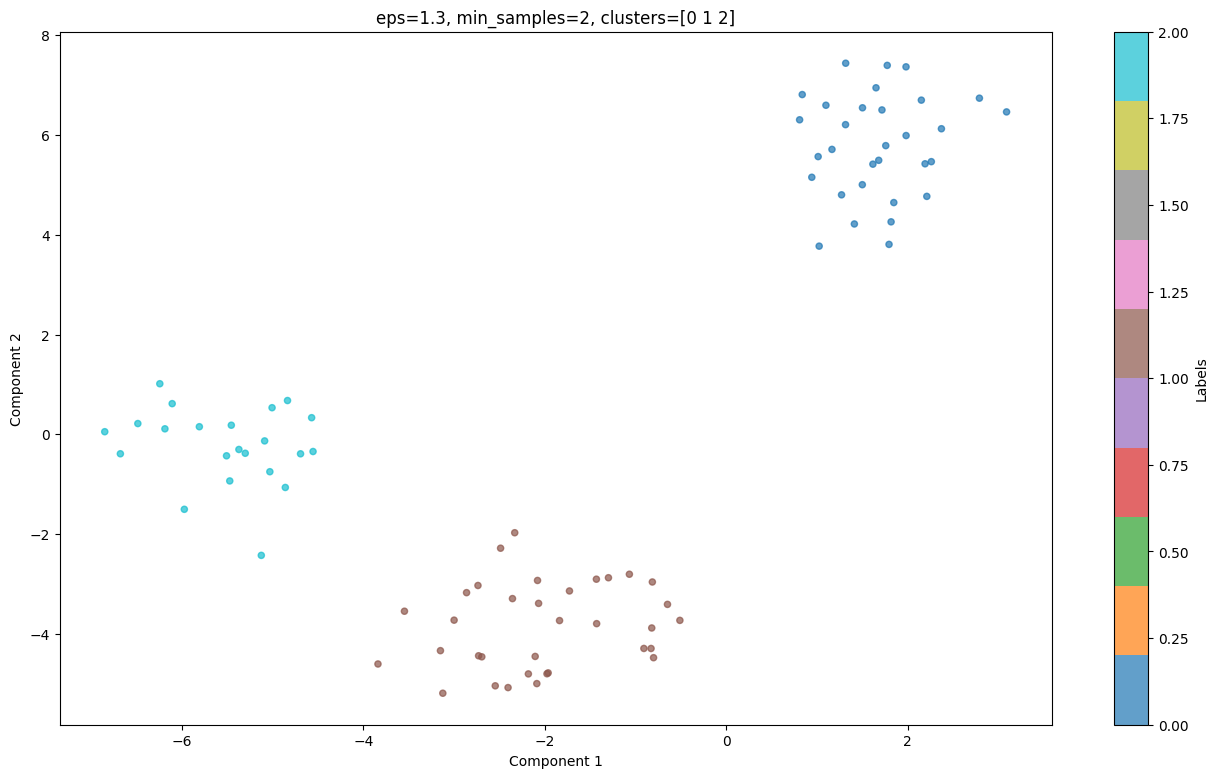

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in tqdm(eps_values):
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Filter out noise points (label == -1)
            if len(set(labels)) > 1 and len(set(labels) - {-1}) > 0:
                score = silhouette_score(data, labels)
                # Davies-Bouldin Index can also be used; lower is better
                db_score = davies_bouldin_score(data, labels)
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    return best_score, best_params, best_labels

# Define the parameter grid
eps_values = np.linspace(0.1, 2, 20)
min_samples_values = range(2, 10)

# Evaluate DBSCAN with the parameter grid
best_score, best_params, best_labels = evaluate_dbscan(reduced_data, eps_values, min_samples_values)

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best labels: {best_labels}")

plt.figure(figsize=(16, 9))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_labels, cmap='tab10', s=20, alpha=0.7)
plt.title(f"eps={best_params[0]}, min_samples={best_params[1]}, clusters={np.unique(best_labels)}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [20]:
from scipy.spatial.distance import cdist

def find_medoid_index(cluster_points):
    distances = cdist(cluster_points, cluster_points, 'euclidean')
    medoid_index = np.argmin(distances.sum(axis=1))
    return medoid_index

def find_representative_points(data, labels):
    unique_labels = np.unique(labels)
    representative_points = []

    for label in unique_labels:
        if label == -1:  # Skip noise points if using DBSCAN
            continue

        cluster_indices = np.where(labels == label)[0]
        cluster_points = data[cluster_indices]
        medoid_index = find_medoid_index(cluster_points)
        representative_points.append(cluster_indices[medoid_index])

    return np.array(representative_points)

In [21]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return
    return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [22]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)
for i, j in enumerate(find_representative_points(data, best_labels)):
    rep_rank[j] = i + 1

In [23]:
for i in tqdm(range(max(rep_rank), len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:39<00:00,  2.11it/s]


In [24]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        selected = train[train.rep_rank<=iteration]
            
        X_train_selected = np.stack(selected.X.values) if len(selected) else selected.X.values
        y_train_selected = selected.risk.values
        
        certain = train[train.uncertainty<=0.571]
        certain = certain[~certain.index.isin(selected.index)]
        if len(certain):
            X_train_certain = np.stack(certain.X.values)
            y_train_certain = certain.pred_label.values
    
        if len(X_train_selected)-2>=(len(X_train_selected)+len(certain))*0.2:
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {int((len(X_train_selected)+len(certain))*0.2)} for validation from selected.')
            X_train_selected, X_valid, y_train_selected, y_valid = train_test_split(X_train_selected, y_train_selected,
                                                                                    test_size=int((len(X_train_selected)+len(certain))*0.2),
                                                                                    random_state=kseed, stratify=y_train_selected)
        
        elif len(X_train_selected)<(len(X_train_selected)+len(certain))*0.2:
            remaining_size = int((len(X_train_selected)+len(certain))*0.2)-len(X_train_selected)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)} for validation from selected and {remaining_size} for validation from certain.')
            if len(X_train_selected):
                X_valid, y_valid = X_train_selected.copy(), y_train_selected.copy()
                X_train_selected, y_train_selected = np.zeros((0, X_train_selected.shape[1])), np.zeros((0))
            else:
                X_train_selected = np.empty((0, X_train_certain.shape[1]))
                y_train_selected = np.empty((0, ))
                X_valid = np.empty(X_train_selected.shape)
                y_valid = np.empty(y_train_selected.shape)
            X_valid = np.concatenate([X_valid, X_train_certain[:remaining_size]])
            y_valid = np.concatenate([y_valid, y_train_certain[:remaining_size]])
            X_train_certain = X_train_certain[remaining_size:]
            y_train_certain = y_train_certain[remaining_size:]
        else:
            remaining_size = len(X_train_selected) - int((len(X_train_selected)+len(certain))*0.2)
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {len(X_train_selected)-remaining_size} for validation from selected.')
            X_valid, y_valid = X_train_selected[:(len(X_train_selected)-remaining_size)], y_train_selected[:(len(X_train_selected)-remaining_size)]
            X_train_selected, y_train_selected = X_train_selected[(len(X_train_selected)-remaining_size):], y_train_selected[(len(X_train_selected)-remaining_size):]
                    
    
        X_train = np.concatenate([X_train_certain, X_train_selected])
        y_train = np.concatenate([y_train_certain, y_train_selected])
        sample_weights = np.concatenate([0.5*np.ones_like(y_train_certain), np.ones_like(y_train_selected)])


        y_train_one = tf.keras.utils.to_categorical(y_train, num_classes=2)
        y_val_one = tf.keras.utils.to_categorical(y_valid, num_classes=2)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            sample_weight=sample_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

Test:
 risk
1.0    14
0.0     4
Name: count, dtype: int64
0 selected and 20 certain, so selecting 0 for validation from selected and 4 for validation from certain.


2024-08-02 18:48:00.003636: I external/local_xla/xla/service/service.cc:168] XLA service 0x7a7530281f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-02 18:48:00.003683: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-02 18:48:00.010467: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1722613680.158703 2152025 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Restoring model weights from the end of the best epoch: 2.
Epoch 52: early stopping


/tmp/ipykernel_2151929/1192981362.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 20 samples with 0.65 positive. Selected 0 samples with nan positive. 16 for training with 0.6875 positive. 4 for validation with 0.5 positive. Test auc: 0.5178571428571428.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 20 certain, so selecting 1 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 2.
Epoch 52: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 20 samples with 0.65 positive. Selected 1 samples with 1.0 positive. 17 for training with 0.7058823529411765 positive. 4 for validation with 0.5 positive. Test auc: 0.5178571428571429.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 67 samples with 0.7611940298507462 positive. 55 for training with 0.7454545454545455 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 0.6071428571428571.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


68 selected and 0 so selecting 13 for validation from selected.
Restoring model weights from the end of the best epoch: 4.
Epoch 54: early stopping


/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 68 samples with 0.7647058823529411 positive. 56 for training with 0.75 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 0.6607142857142857.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


69 selected and 0 so selecting 13 for validation from selected.
Restoring model weights from the end of the best epoch: 4.
Epoch 54: early stopping


/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 69 samples with 0.7681159420289855 positive. 57 for training with 0.7543859649122807 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 0.7321428571428572.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Test:
 risk
1.0    14
0.0     4
Name: count, dtype: int64
0 selected and 19 certain, so selecting 0 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


/tmp/ipykernel_2151929/1192981362.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 19 samples with 0.631578947368421 positive. Selected 0 samples with nan positive. 16 for training with 0.6875 positive. 3 for validation with 0.3333333333333333 positive. Test auc: 0.19642857142857142.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 19 certain, so selecting 1 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 19 samples with 0.631578947368421 positive. Selected 1 samples with 0.0 positive. 16 for training with 0.6875 positive. 4 for validation with 0.25 positive. Test auc: 0.19642857142857142.
- - - - - - - - - - - - - -

/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 67 samples with 0.7611940298507462 positive. 55 for training with 0.7636363636363637 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 0.9285714285714286.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


68 selected and 0 so selecting 13 for validation from selected.
Restoring model weights from the end of the best epoch: 5.
Epoch 55: early stopping


/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 68 samples with 0.7647058823529411 positive. 56 for training with 0.7678571428571429 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 0.9464285714285714.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


69 selected and 0 so selecting 13 for validation from selected.
Restoring model weights from the end of the best epoch: 4.
Epoch 54: early stopping


/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 69 samples with 0.7681159420289855 positive. 57 for training with 0.7719298245614035 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 0.9285714285714286.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Test:
 risk
1.0    13
0.0     4
Name: count, dtype: int64
0 selected and 20 certain, so selecting 0 for validation from selected and 4 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


/tmp/ipykernel_2151929/1192981362.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 20 samples with 0.6 positive. Selected 0 samples with nan positive. 16 for training with 0.625 positive. 4 for validation with 0.5 positive. Test auc: 0.07692307692307693.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 20 certain, so selecting 1 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 20 samples with 0.6 positive. Selected 1 samples with 0.0 positive. 17 for training with 0.6470588235294118 positive. 4 for validation with 0.25 positive. Test auc: 0.057692307692307696.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 69 samples with 0.7681159420289855 positive. 57 for training with 0.7543859649122807 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 1.0.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


70 selected and 0 so selecting 14 for validation from selected.
Restoring model weights from the end of the best epoch: 14.
Epoch 64: early stopping


/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 70 samples with 0.7714285714285715 positive. 57 for training with 0.7543859649122807 positive. 14 for validation with 0.7857142857142857 positive. Test auc: 1.0.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Test:
 risk
1.0    13
0.0     4
Name: count, dtype: int64
0 selected and 19 certain, so selecting 0 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


/tmp/ipykernel_2151929/1192981362.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 19 samples with 0.5789473684210527 positive. Selected 0 samples with nan positive. 16 for training with 0.625 positive. 3 for validation with 0.3333333333333333 positive. Test auc: 0.3653846153846154.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 19 certain, so selecting 1 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 19 samples with 0.5789473684210527 positive. Selected 1 samples with 0.0 positive. 16 for training with 0.625 positive. 4 for validation with 0.25 positive. Test auc: 0.3653846153846154.
- - - - - - - - - - - - - - -

/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 69 samples with 0.7681159420289855 positive. 57 for training with 0.7543859649122807 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 0.6730769230769231.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


70 selected and 0 so selecting 14 for validation from selected.
Restoring model weights from the end of the best epoch: 8.
Epoch 58: early stopping


/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 70 samples with 0.7714285714285715 positive. 57 for training with 0.7543859649122807 positive. 14 for validation with 0.7857142857142857 positive. Test auc: 0.6730769230769231.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Test:
 risk
1.0    13
0.0     4
Name: count, dtype: int64
0 selected and 18 certain, so selecting 0 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


/tmp/ipykernel_2151929/1192981362.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 18 samples with 0.6666666666666666 positive. Selected 0 samples with nan positive. 15 for training with 0.7333333333333333 positive. 3 for validation with 0.3333333333333333 positive. Test auc: 0.07692307692307693.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 18 certain, so selecting 1 for validation from selected and 2 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 18 samples with 0.6666666666666666 positive. Selected 1 samples with 0.0 positive. 16 for training with 0.75 positive. 3 for validation with 0.0 positive. Test auc: 0.07692307692307693.
- - - - - - - - 

/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 68 samples with 0.7647058823529411 positive. 56 for training with 0.75 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 1.0.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


69 selected and 0 so selecting 13 for validation from selected.
Restoring model weights from the end of the best epoch: 11.
Epoch 61: early stopping


/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 69 samples with 0.7681159420289855 positive. 57 for training with 0.7543859649122807 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 1.0.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


70 selected and 0 so selecting 14 for validation from selected.
Restoring model weights from the end of the best epoch: 10.
Epoch 60: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 70 samples with 0.7714285714285715 positive. 57 for training with 0.7543859649122807 positive. 14 for validation with 0.7857142857142857 positive. Test auc: 1.0.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

/tmp/ipykernel_2151929/1192981362.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [25]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [26]:
test_scores

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.517857,0.517857,0.446429,0.446429,0.410714,0.500000,0.500000,0.732143,0.732143,0.732143,...,0.607143,0.553571,0.571429,0.642857,0.625000,0.553571,0.607143,0.660714,0.732143,0.891026
1,0.196429,0.196429,0.178571,0.196429,0.196429,0.178571,0.178571,0.160714,0.321429,0.500000,...,0.928571,0.928571,0.928571,0.928571,0.946429,0.946429,0.928571,0.946429,0.928571,0.891026
2,0.076923,0.057692,0.057692,0.038462,0.038462,0.096154,0.038462,0.000000,0.326923,0.346154,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.884615,1.000000,1.000000,1.000000
3,0.365385,0.365385,0.326923,0.269231,0.250000,0.250000,0.269231,0.250000,0.538462,0.519231,...,0.653846,0.634615,0.634615,0.557692,0.673077,0.653846,0.653846,0.634615,0.673077,0.673077
4,0.076923,0.076923,0.076923,0.173077,0.211538,0.096154,0.346154,0.442308,0.557692,0.442308,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


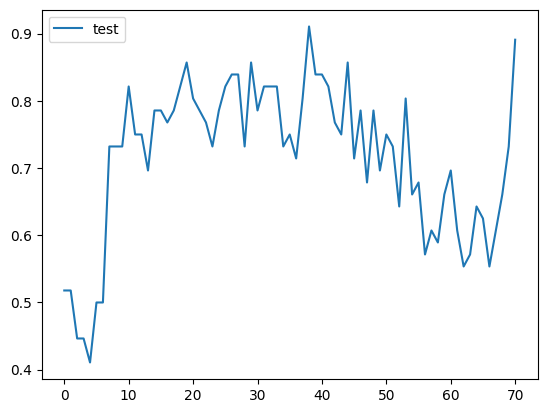

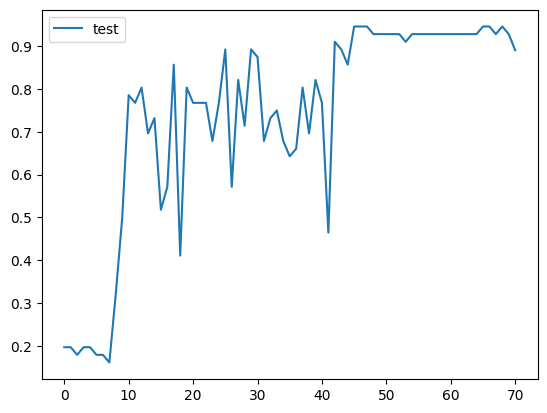

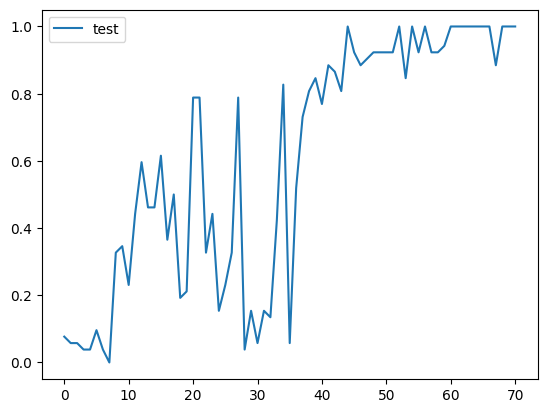

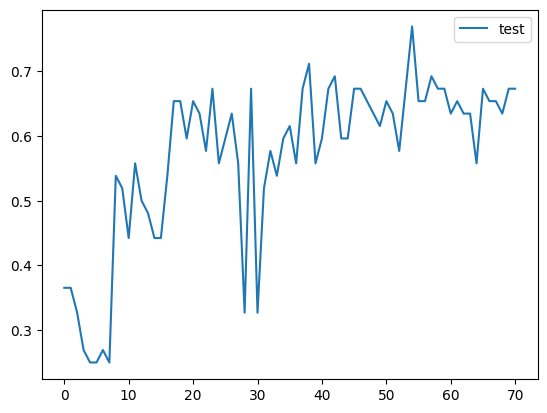

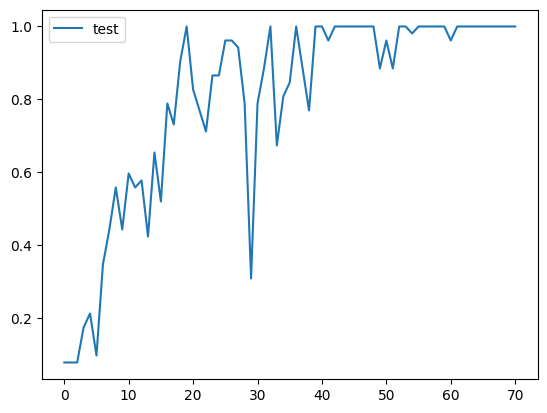

In [27]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

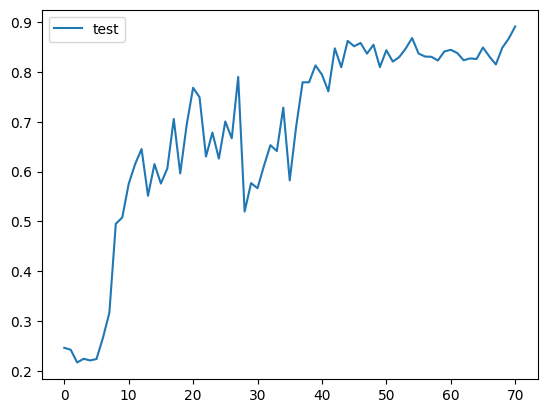

In [28]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [29]:
test_scores.to_pickle('BHI/res_test_rep_rep_red_pseudo_sw.pkl')

In [30]:
with open('BHI/test_rep_rep_red_pseudo_sw.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# Uncertainty and representation pseudo labels sample weights

In [18]:
def mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    from sklearn import metrics
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    # return XX.mean() + YY.mean() - 2 * XY.mean()
    return 2 * XY.mean() - XX.mean()


def fun(x):
    if rep_rank[x.name]!=0:
        return -np.inf
    if rep_rank.sum():
        pre = mmd_rbf(data[np.where(rep_rank!=0)], data)
        post = mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)
        return x.uncertainty + ((post - pre) / pre)
    else:
        return x.uncertainty + mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)
        # return mmd_rbf(np.vstack([np.array(x.X), data[np.where(rep_rank!=0)]]), data)

In [19]:
data = np.stack(df.X.values)
rep_rank = np.zeros((len(data)), dtype=int)

In [20]:
for i in tqdm(range(len(rep_rank))):
    rep_rank[df.apply(fun, axis=1).argmax()] = i + 1

df['rep_rank'] = rep_rank-1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87/87 [02:04<00:00,  1.43s/it]


In [21]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_preds = []
valid_preds = []
y_tests = []
test_scores = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_preds.append([])
    valid_preds.append([])
    test_scores.append({})
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_tests.append(test.risk.values)
    y_test = y_tests[-1]
    print('Test:\n', test.risk.value_counts())

    for iteration in np.append(train.rep_rank.min()-1, train.rep_rank.sort_values().values):

        selected = train[train.rep_rank<=iteration]
            
        X_train_selected = np.stack(selected.X.values) if len(selected) else selected.X.values
        y_train_selected = selected.risk.values
        
        certain = train[train.uncertainty<=0.571]
        certain = certain[~certain.index.isin(selected.index)]
        if len(certain):
            X_train_certain = np.stack(certain.X.values)
            y_train_certain = certain.pred_label.values
    
        if len(X_train_selected)-2>=(len(X_train_selected)+len(certain))*0.2:
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {int((len(X_train_selected)+len(certain))*0.2)} for validation from selected.')
            X_train_selected, X_valid, y_train_selected, y_valid = train_test_split(X_train_selected, y_train_selected,
                                                                                    test_size=int((len(X_train_selected)+len(certain))*0.2),
                                                                                    random_state=kseed, stratify=y_train_selected)
        
        elif len(X_train_selected)<(len(X_train_selected)+len(certain))*0.2:
            remaining_size = int((len(X_train_selected)+len(certain))*0.2)-len(X_train_selected)
            print(f'{len(X_train_selected)} selected and {len(certain)} certain, so selecting {len(X_train_selected)} for validation from selected and {remaining_size} for validation from certain.')
            if len(X_train_selected):
                X_valid, y_valid = X_train_selected.copy(), y_train_selected.copy()
                X_train_selected, y_train_selected = np.zeros((0, X_train_selected.shape[1])), np.zeros((0))
            else:
                X_train_selected = np.empty((0, X_train_certain.shape[1]))
                y_train_selected = np.empty((0, ))
                X_valid = np.empty(X_train_selected.shape)
                y_valid = np.empty(y_train_selected.shape)
            X_valid = np.concatenate([X_valid, X_train_certain[:remaining_size]])
            y_valid = np.concatenate([y_valid, y_train_certain[:remaining_size]])
            X_train_certain = X_train_certain[remaining_size:]
            y_train_certain = y_train_certain[remaining_size:]
        else:
            remaining_size = len(X_train_selected) - int((len(X_train_selected)+len(certain))*0.2)
            print(f'{len(X_train_selected)} selected and {len(certain)} so selecting {len(X_train_selected)-remaining_size} for validation from selected.')
            X_valid, y_valid = X_train_selected[:(len(X_train_selected)-remaining_size)], y_train_selected[:(len(X_train_selected)-remaining_size)]
            X_train_selected, y_train_selected = X_train_selected[(len(X_train_selected)-remaining_size):], y_train_selected[(len(X_train_selected)-remaining_size):]
                    
    
        X_train = np.concatenate([X_train_certain, X_train_selected])
        y_train = np.concatenate([y_train_certain, y_train_selected])
        sample_weights = np.concatenate([0.5*np.ones_like(y_train_certain), np.ones_like(y_train_selected)])


        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            sample_weight=sample_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_preds[-1].append(model.predict(X_test, verbose=0)[:,1])
        valid_preds[-1].append(model.predict(X_valid, verbose=0)[:,1])
        test_scores[-1][len(selected)] = roc_auc_score(y_test, test_preds[-1][-1])
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {roc_auc_score(y_test, test_preds[-1][-1])}.\n' + 30*'- - ' + '\n\n')

Test:
 risk
1.0    14
0.0     4
Name: count, dtype: int64
0 selected and 20 certain, so selecting 0 for validation from selected and 4 for validation from certain.


2024-08-03 19:51:03.645606: I external/local_xla/xla/service/service.cc:168] XLA service 0x75adc8402780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-03 19:51:03.645655: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-03 19:51:03.653391: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1722703863.808520 3302013 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Restoring model weights from the end of the best epoch: 2.
Epoch 52: early stopping


/tmp/ipykernel_3299420/1835912271.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 20 samples with 0.65 positive. Selected 0 samples with nan positive. 16 for training with 0.6875 positive. 4 for validation with 0.5 positive. Test auc: 0.5178571428571428.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 20 certain, so selecting 1 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 20 samples with 0.65 positive. Selected 1 samples with 1.0 positive. 17 for training with 0.7058823529411765 positive. 4 for validation with 0.5 positive. Test auc: 0.4464285714285714.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

/tmp/ipykernel_3299420/1835912271.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 69 samples with 0.7681159420289855 positive. 57 for training with 0.7719298245614035 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 0.7142857142857143.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Test:
 risk
1.0    14
0.0     4
Name: count, dtype: int64
0 selected and 19 certain, so selecting 0 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


/tmp/ipykernel_3299420/1835912271.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 19 samples with 0.631578947368421 positive. Selected 0 samples with nan positive. 16 for training with 0.6875 positive. 3 for validation with 0.3333333333333333 positive. Test auc: 0.19642857142857142.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 19 certain, so selecting 1 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 19 samples with 0.631578947368421 positive. Selected 1 samples with 1.0 positive. 16 for training with 0.6875 positive. 4 for validation with 0.5 positive. Test auc: 0.19642857142857142.
- - - - - - - - - - - - - - 

/tmp/ipykernel_3299420/1835912271.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 69 samples with 0.7681159420289855 positive. 57 for training with 0.7719298245614035 positive. 13 for validation with 0.7692307692307693 positive. Test auc: 0.9464285714285714.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Test:
 risk
1.0    13
0.0     4
Name: count, dtype: int64
0 selected and 20 certain, so selecting 0 for validation from selected and 4 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


/tmp/ipykernel_3299420/1835912271.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 20 samples with 0.6 positive. Selected 0 samples with nan positive. 16 for training with 0.625 positive. 4 for validation with 0.5 positive. Test auc: 0.07692307692307693.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 20 certain, so selecting 1 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 20 samples with 0.6 positive. Selected 1 samples with 1.0 positive. 17 for training with 0.6470588235294118 positive. 4 for validation with 0.5 positive. Test auc: 0.057692307692307696.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

/tmp/ipykernel_3299420/1835912271.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 70 samples with 0.7714285714285715 positive. 57 for training with 0.7719298245614035 positive. 14 for validation with 0.7857142857142857 positive. Test auc: 1.0.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Test:
 risk
1.0    13
0.0     4
Name: count, dtype: int64
0 selected and 19 certain, so selecting 0 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


/tmp/ipykernel_3299420/1835912271.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 19 samples with 0.5789473684210527 positive. Selected 0 samples with nan positive. 16 for training with 0.625 positive. 3 for validation with 0.3333333333333333 positive. Test auc: 0.3653846153846154.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 19 certain, so selecting 1 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 19 samples with 0.5789473684210527 positive. Selected 1 samples with 1.0 positive. 16 for training with 0.625 positive. 4 for validation with 0.5 positive. Test auc: 0.3653846153846154.
- - - - - - - - - - - - - - - 

/tmp/ipykernel_3299420/1835912271.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 0 samples with nan positive. Selected 70 samples with 0.7714285714285715 positive. 57 for training with 0.7543859649122807 positive. 14 for validation with 0.7857142857142857 positive. Test auc: 0.6923076923076923.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Test:
 risk
1.0    13
0.0     4
Name: count, dtype: int64
0 selected and 18 certain, so selecting 0 for validation from selected and 3 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


/tmp/ipykernel_3299420/1835912271.py:108: RuntimeWarning: Mean of empty slice.
  f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 18 samples with 0.6666666666666666 positive. Selected 0 samples with nan positive. 15 for training with 0.7333333333333333 positive. 3 for validation with 0.3333333333333333 positive. Test auc: 0.07692307692307693.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


1 selected and 18 certain, so selecting 1 for validation from selected and 2 for validation from certain.
Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Certain about 18 samples with 0.6666666666666666 positive. Selected 1 samples with 1.0 positive. 16 for training with 0.75 positive. 3 for validation with 0.3333333333333333 positive. Test auc: 0.07692307692307693.
-

/tmp/ipykernel_3299420/1835912271.py:107: RuntimeWarning: Mean of empty slice.
  print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
/home/biosim/Fanis/carotid_ultrasound/venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [22]:
test_scores = pd.DataFrame(test_scores)
test_scores = test_scores.reindex(sorted(test_scores.columns), axis=1)
test_scores.fillna(test_scores.mean(), inplace=True)

In [23]:
test_scores

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0.517857,0.446429,0.446429,0.500000,0.482143,0.464286,0.678571,0.678571,0.660714,0.660714,...,0.732143,0.642857,0.517857,0.607143,0.607143,0.553571,0.571429,0.660714,0.714286,0.897436
1,0.196429,0.196429,0.178571,0.214286,0.142857,0.250000,0.482143,0.910714,0.267857,0.267857,...,0.928571,0.928571,0.946429,0.928571,0.928571,0.946429,0.946429,0.928571,0.946429,0.897436
2,0.076923,0.057692,0.057692,0.076923,0.038462,0.038462,0.230769,0.211538,0.653846,0.653846,...,1.000000,1.000000,1.000000,0.980769,1.000000,0.923077,0.903846,1.000000,1.000000,1.000000
3,0.365385,0.365385,0.326923,0.403846,0.461538,0.730769,0.730769,0.807692,0.846154,0.557692,...,0.615385,0.615385,0.673077,0.615385,0.634615,0.769231,0.673077,0.653846,0.653846,0.692308
4,0.076923,0.076923,0.076923,0.173077,0.134615,0.096154,0.730769,0.480769,0.192308,0.307692,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


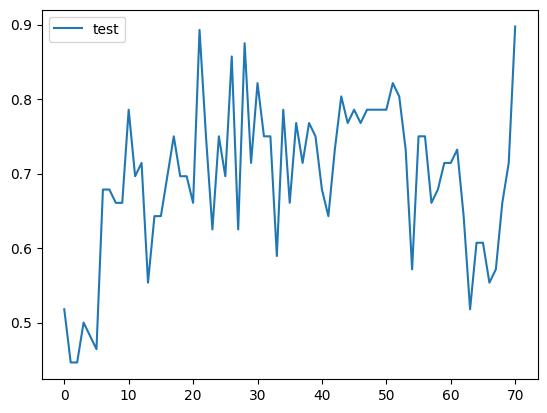

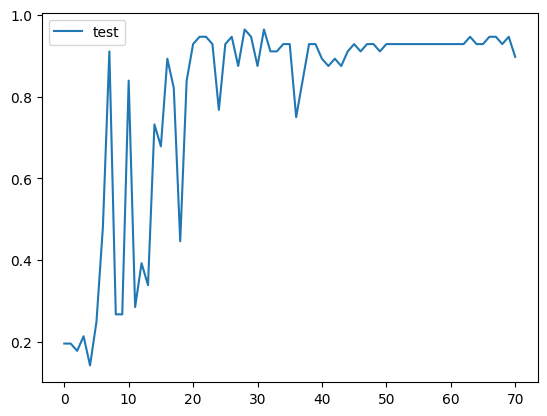

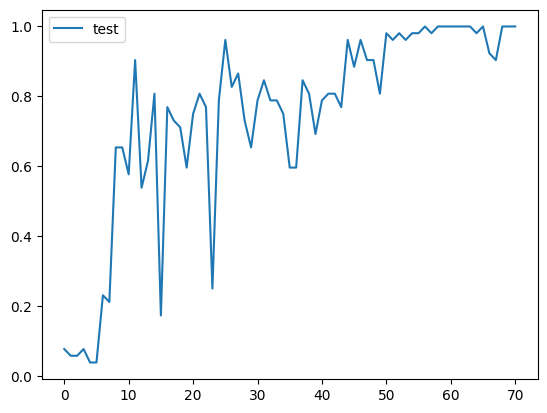

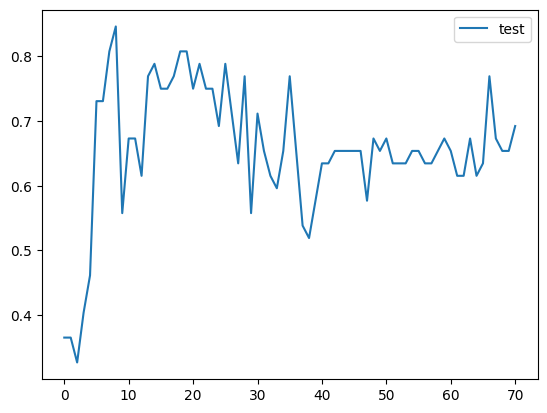

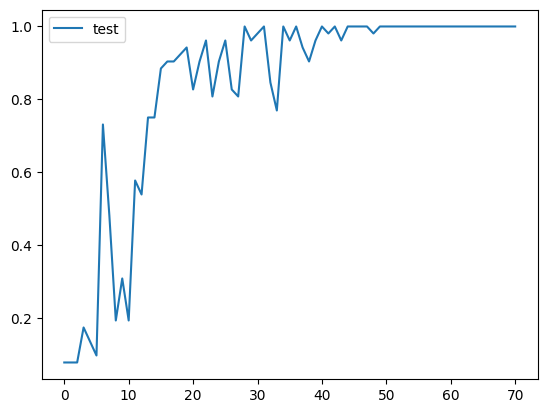

In [24]:
for i in range(len(test_scores)):
    plt.figure()
    plt.plot(test_scores.iloc[i], label='test')
    plt.legend()

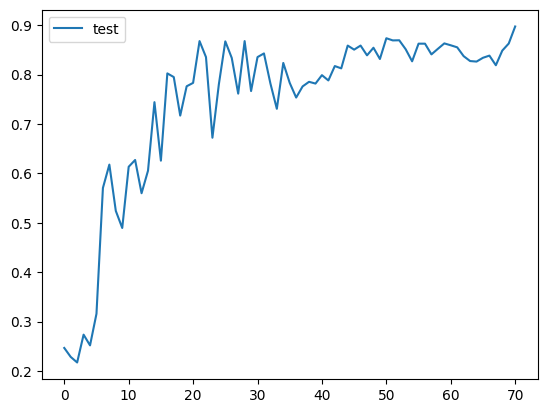

In [25]:
plt.figure()
plt.plot(test_scores.mean(axis=0), label='test')
plt.legend()

In [26]:
test_scores.to_pickle('BHI/res_test_selected_rep_pseudo_sw.pkl')

In [27]:
with open('BHI/test_selected_rep_pseudo_sw.pkl', 'wb') as f:
    pickle.dump(test_preds, f)
# with open('BHI/valid_random.pkl', 'wb') as f:
#     pickle.dump(valid_scores, f)

# See results

In [2]:
test_sel_ps = pd.read_pickle('BHI/res_test_selected_valid_pseudo.pkl')
test_sel_ps_sw = pd.read_pickle('BHI/res_test_selected_valid_pseudo_sample.pkl')
test_sel = pd.read_pickle('BHI/res_test_selected_valid.pkl')
test_rnd = pd.read_pickle('BHI/res_test_random.pkl')
test_bench = pd.read_pickle('BHI/res_test_bench.pkl')
test_rep = pd.read_pickle('BHI/res_test_rep.pkl')
test_rep_pseudo = pd.read_pickle('BHI/res_test_rep_pseudo.pkl')
test_rep_pseudo_sw = pd.read_pickle('BHI/res_test_rep_pseudo_sw.pkl')
test_rep_rep_red = pd.read_pickle('BHI/res_test_rep_rep_red.pkl')
test_rep_rep_red_pseudo = pd.read_pickle('BHI/res_test_rep_rep_red_pseudo.pkl')
test_rep_rep_red_pseudo_sw = pd.read_pickle('BHI/res_test_rep_rep_red_pseudo_sw.pkl')
test_rep_rep_or = pd.read_pickle('BHI/res_test_rep_rep_or.pkl')
test_rep_rep_or_pseudo = pd.read_pickle('BHI/res_test_rep_rep_or_pseudo.pkl')
test_rep_rep_or_pseudo_sw = pd.read_pickle('BHI/res_test_rep_rep_or_pseudo_sw.pkl')
test_selected_rep_pseudo_sw = pd.read_pickle('BHI/res_test_selected_rep_pseudo_sw.pkl')

In [3]:
test_sel_ps = test_sel_ps.values
test_sel_ps_sw = test_sel_ps_sw.values
test_sel = test_sel.values
test_rnd = test_rnd.values
test_bench = test_bench.values
test_rep = test_rep.values
test_rep_pseudo = test_rep_pseudo.values
test_rep_pseudo_sw = test_rep_pseudo_sw.values
test_rep_rep_red = test_rep_rep_red.values
test_rep_rep_red_pseudo = test_rep_rep_red_pseudo.values
test_rep_rep_red_pseudo_sw = test_rep_rep_red_pseudo_sw.values
test_rep_rep_or = test_rep_rep_or.values
test_rep_rep_or_pseudo = test_rep_rep_or_pseudo.values
test_rep_rep_or_pseudo_sw = test_rep_rep_or_pseudo_sw.values
test_selected_rep_pseudo_sw = test_selected_rep_pseudo_sw.values

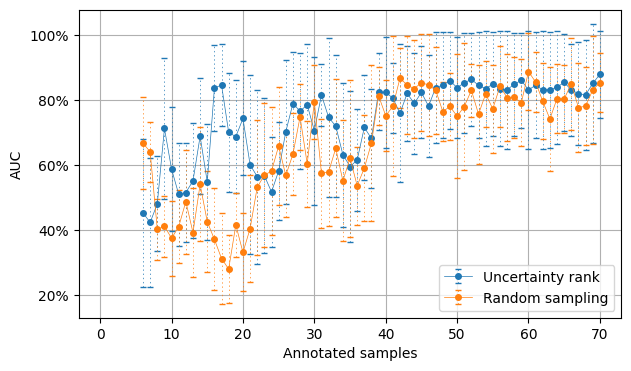

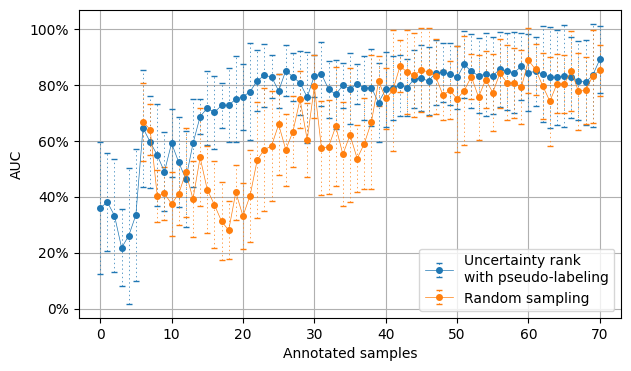

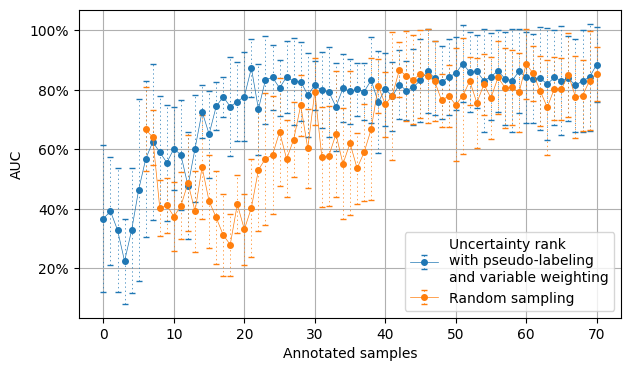

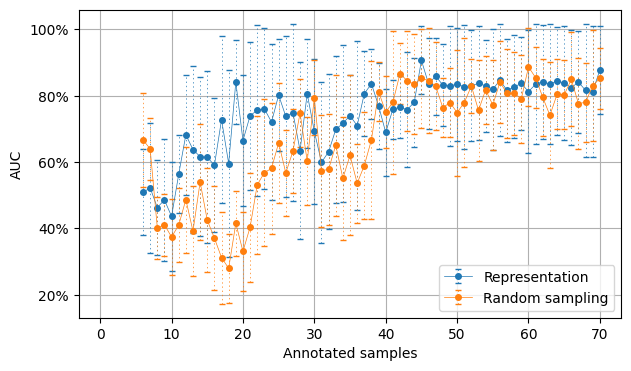

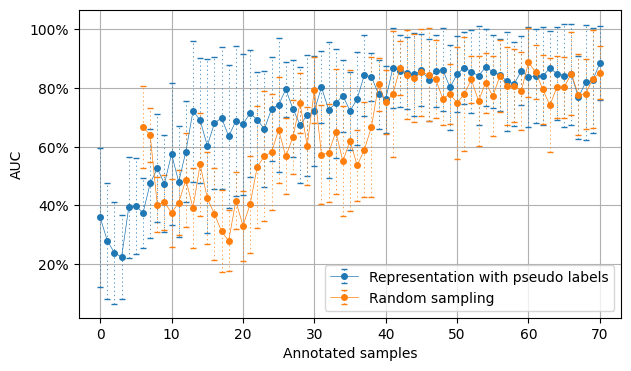

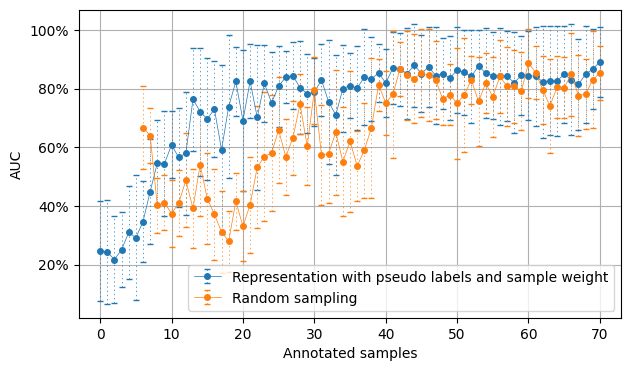

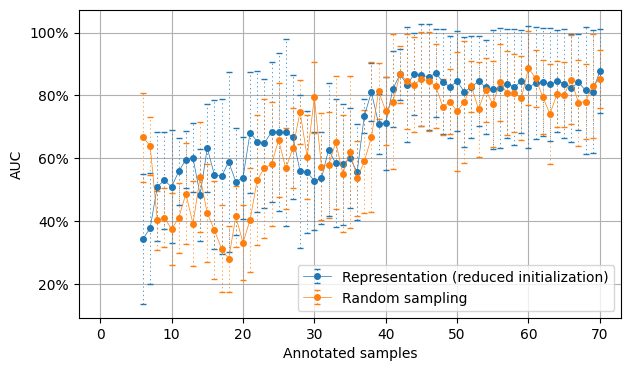

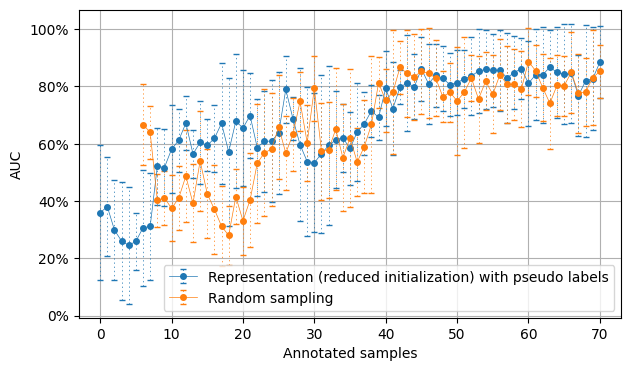

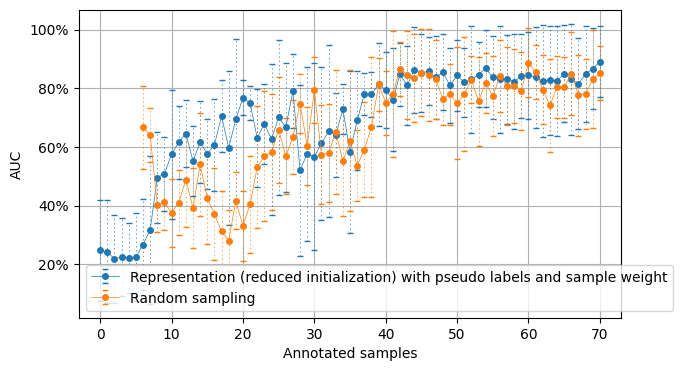

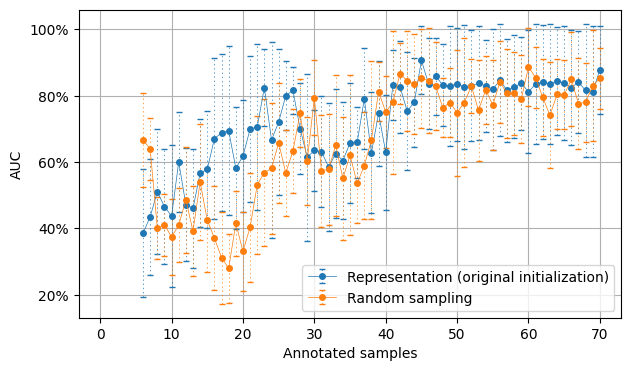

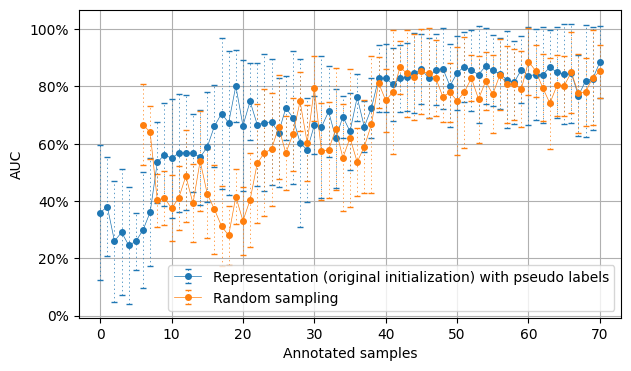

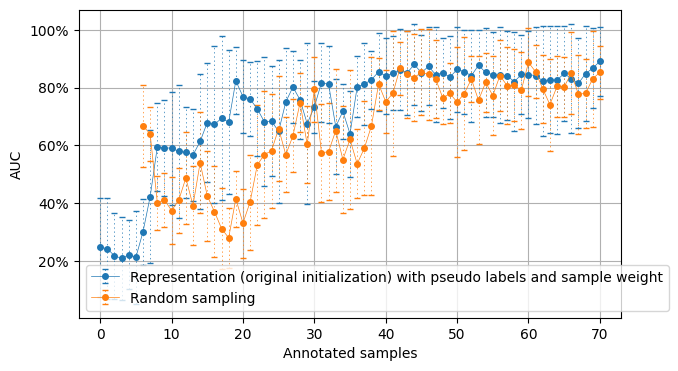

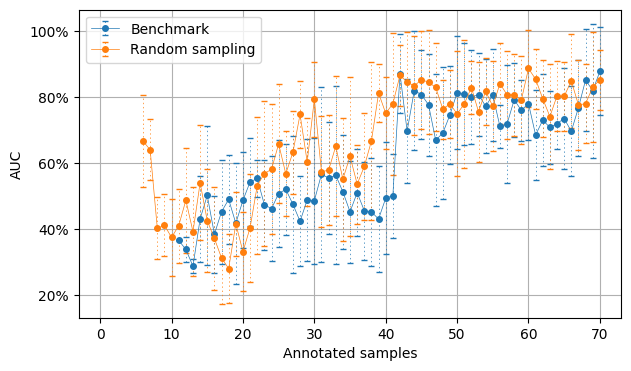

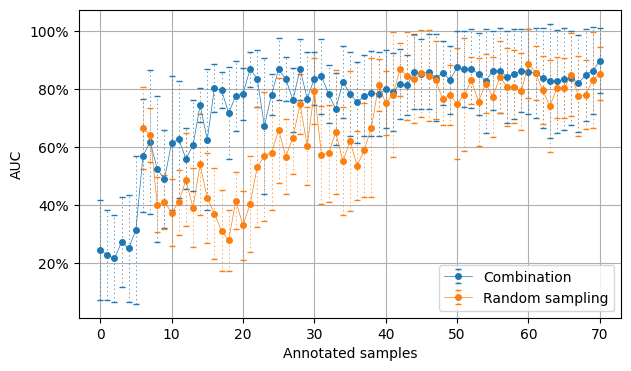

In [4]:
fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_sel.shape[1], 71)), test_sel.mean(axis=0), yerr=test_sel.std(axis=0), fmt='-o', label='Uncertainty rank', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_sel_ps.shape[1], 71)), test_sel_ps.mean(axis=0), yerr=test_sel_ps.std(axis=0), fmt='-o', label='Uncertainty rank\nwith pseudo-labeling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_sel_ps_sw.shape[1], 71)), test_sel_ps_sw.mean(axis=0), yerr=test_sel_ps_sw.std(axis=0), fmt='-o', label='Uncertainty rank\nwith pseudo-labeling\nand variable weighting', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
# fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_rep.shape[1], 71)), test_rep.mean(axis=0), yerr=test_rep.std(axis=0), fmt='-o', label='Representation', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_rep_pseudo.shape[1], 71)), test_rep_pseudo.mean(axis=0), yerr=test_rep_pseudo.std(axis=0), fmt='-o', label='Representation with pseudo labels', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_rep_pseudo_sw.shape[1], 71)), test_rep_pseudo_sw.mean(axis=0), yerr=test_rep_pseudo_sw.std(axis=0), fmt='-o', label='Representation with pseudo labels and sample weight', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_rep_rep_red.shape[1], 71)), test_rep_rep_red.mean(axis=0), yerr=test_rep_rep_red.std(axis=0), fmt='-o', label='Representation (reduced initialization)', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_rep_rep_red_pseudo.shape[1], 71)), test_rep_rep_red_pseudo.mean(axis=0), yerr=test_rep_rep_red_pseudo.std(axis=0), fmt='-o', label='Representation (reduced initialization) with pseudo labels', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_rep_rep_red_pseudo_sw.shape[1], 71)), test_rep_rep_red_pseudo_sw.mean(axis=0), yerr=test_rep_rep_red_pseudo_sw.std(axis=0), fmt='-o', label='Representation (reduced initialization) with pseudo labels and sample weight', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_rep_rep_or.shape[1], 71)), test_rep_rep_or.mean(axis=0), yerr=test_rep_rep_or.std(axis=0), fmt='-o', label='Representation (original initialization)', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_rep_rep_or_pseudo.shape[1], 71)), test_rep_rep_or_pseudo.mean(axis=0), yerr=test_rep_rep_or_pseudo.std(axis=0), fmt='-o', label='Representation (original initialization) with pseudo labels', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_rep_rep_or_pseudo_sw.shape[1], 71)), test_rep_rep_or_pseudo_sw.mean(axis=0), yerr=test_rep_rep_or_pseudo_sw.std(axis=0), fmt='-o', label='Representation (original initialization) with pseudo labels and sample weight', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_bench.shape[1], 71)), test_bench.mean(axis=0), yerr=test_bench.std(axis=0), fmt='-o', label='Benchmark', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_selected_rep_pseudo_sw.shape[1], 71)), test_selected_rep_pseudo_sw.mean(axis=0), yerr=test_selected_rep_pseudo_sw.std(axis=0), fmt='-o', label='Combination', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()



# plt.figure(figsize=(10, 6))
# plt.errorbar(list(range(71-valid_sel_ps.shape[1], 71)), valid_sel_ps.mean(axis=0), yerr=valid_sel_ps.std(axis=0), fmt='-o', label='valid selected pseudo', capsize=5)
# plt.errorbar(list(range(71-valid_sel_ps_sw.shape[1], 71)), valid_sel_ps_sw.mean(axis=0), yerr=valid_sel_ps_sw.std(axis=0), fmt='-o', label='valid selected pseudo sample weight', capsize=5)
# plt.errorbar(list(range(71-valid_sel.shape[1], 71)), valid_sel.mean(axis=0), yerr=valid_sel.std(axis=0), fmt='-o', label='valid selected', capsize=5)
# plt.errorbar(list(range(71-valid_rnd.shape[1], 71)), valid_rnd.mean(axis=0), yerr=valid_rnd.std(axis=0), fmt='-o', label='valid random', capsize=5)
# plt.grid(True)
# plt.show()

In [8]:
test_sel_ps_sw.std(axis=0)[21]

0.09662990471738102

In [5]:
test_sel_ps = np.array([test_sel_ps.mean(axis=0)[i:].mean() for i in range(test_sel_ps.shape[1])])[np.newaxis, :]
test_sel_ps_sw = np.array([test_sel_ps_sw.mean(axis=0)[i:].mean() for i in range(test_sel_ps_sw.shape[1])])[np.newaxis, :]
test_sel = np.array([test_sel.mean(axis=0)[i:].mean() for i in range(test_sel.shape[1])])[np.newaxis, :]
test_rnd = np.array([test_rnd.mean(axis=0)[i:].mean() for i in range(test_rnd.shape[1])])[np.newaxis, :]
test_bench = np.array([test_bench.mean(axis=0)[i:].mean() for i in range(test_bench.shape[1])])[np.newaxis, :]
test_rep = np.array([test_rep.mean(axis=0)[i:].mean() for i in range(test_rep.shape[1])])[np.newaxis, :]
test_rep_pseudo = np.array([test_rep_pseudo.mean(axis=0)[i:].mean() for i in range(test_rep_pseudo.shape[1])])[np.newaxis, :]
test_rep_pseudo_sw = np.array([test_rep_pseudo_sw.mean(axis=0)[i:].mean() for i in range(test_rep_pseudo_sw.shape[1])])[np.newaxis, :]
test_rep_rep_red = np.array([test_rep_rep_red.mean(axis=0)[i:].mean() for i in range(test_rep_rep_red.shape[1])])[np.newaxis, :]
test_rep_rep_red_pseudo = np.array([test_rep_rep_red_pseudo.mean(axis=0)[i:].mean() for i in range(test_rep_rep_red_pseudo.shape[1])])[np.newaxis, :]
test_rep_rep_red_pseudo_sw = np.array([test_rep_rep_red_pseudo_sw.mean(axis=0)[i:].mean() for i in range(test_rep_rep_red_pseudo_sw.shape[1])])[np.newaxis, :]
test_rep_rep_or = np.array([test_rep_rep_or.mean(axis=0)[i:].mean() for i in range(test_rep_rep_or.shape[1])])[np.newaxis, :]
test_rep_rep_or_pseudo = np.array([test_rep_rep_or_pseudo.mean(axis=0)[i:].mean() for i in range(test_rep_rep_or_pseudo.shape[1])])[np.newaxis, :]
test_rep_rep_or_pseudo_sw = np.array([test_rep_rep_or_pseudo_sw.mean(axis=0)[i:].mean() for i in range(test_rep_rep_or_pseudo_sw.shape[1])])[np.newaxis, :]
test_selected_rep_pseudo_sw = np.array([test_selected_rep_pseudo_sw.mean(axis=0)[i:].mean() for i in range(test_selected_rep_pseudo_sw.shape[1])])[np.newaxis, :]

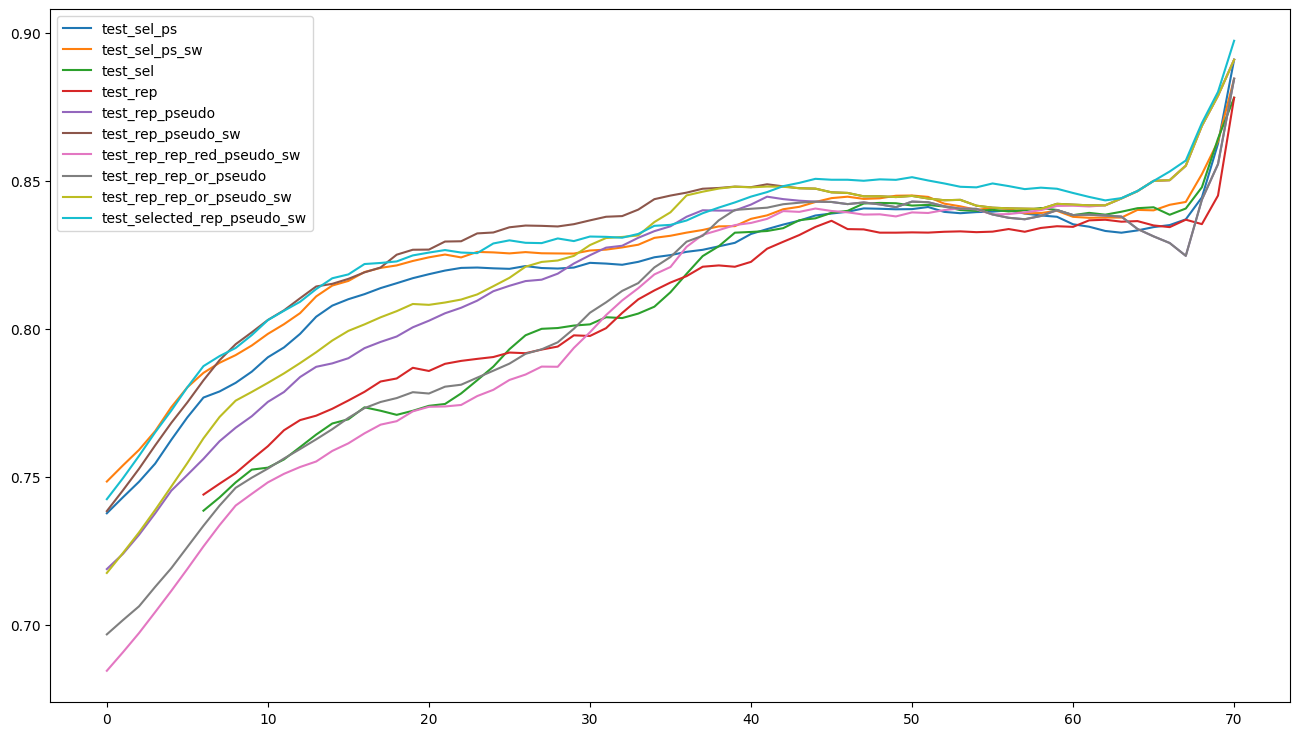

In [15]:
fig = plt.figure(figsize=(16, 9))
plt.plot(list(range(71-test_sel_ps.shape[1], 71)), test_sel_ps[0], label='test_sel_ps')
plt.plot(list(range(71-test_sel_ps_sw.shape[1], 71)), test_sel_ps_sw[0], label='test_sel_ps_sw')
plt.plot(list(range(71-test_sel.shape[1], 71)), test_sel[0], label='test_sel')
# plt.plot(list(range(71-test_rnd.shape[1], 71)), test_rnd[0], label='test_rnd')
# plt.plot(list(range(71-test_bench.shape[1], 71)), test_bench[0], label='test_bench')
plt.plot(list(range(71-test_rep.shape[1], 71)), test_rep[0], label='test_rep')
plt.plot(list(range(71-test_rep_pseudo.shape[1], 71)), test_rep_pseudo[0], label='test_rep_pseudo')
plt.plot(list(range(71-test_rep_pseudo_sw.shape[1], 71)), test_rep_pseudo_sw[0], label='test_rep_pseudo_sw')
# plt.plot(list(range(71-test_rep_rep_red.shape[1], 71)), test_rep_rep_red[0], label='test_rep_rep_red')
# plt.plot(list(range(71-test_rep_rep_red_pseudo.shape[1], 71)), test_rep_rep_red_pseudo[0], label='test_rep_rep_red_pseudo')
plt.plot(list(range(71-test_rep_rep_red_pseudo_sw.shape[1], 71)), test_rep_rep_red_pseudo_sw[0], label='test_rep_rep_red_pseudo_sw')
# plt.plot(list(range(71-test_rep_rep_or.shape[1], 71)), test_rep_rep_or[0], label='test_rep_rep_or')
plt.plot(list(range(71-test_rep_rep_or_pseudo.shape[1], 71)), test_rep_rep_or_pseudo[0], label='test_rep_rep_or_pseudo')
plt.plot(list(range(71-test_rep_rep_or_pseudo_sw.shape[1], 71)), test_rep_rep_or_pseudo_sw[0], label='test_rep_rep_or_pseudo_sw')
plt.plot(list(range(71-test_selected_rep_pseudo_sw.shape[1], 71)), test_selected_rep_pseudo_sw[0], label='test_selected_rep_pseudo_sw')
plt.legend()

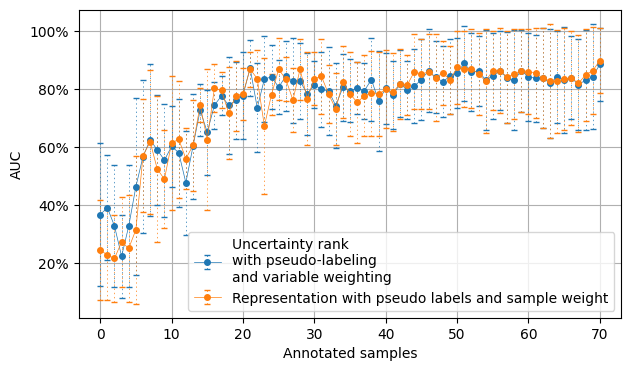

In [22]:
fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_sel_ps_sw.shape[1], 71)), test_sel_ps_sw.mean(axis=0), yerr=test_sel_ps_sw.std(axis=0), fmt='-o', label='Uncertainty rank\nwith pseudo-labeling\nand variable weighting', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_selected_rep_pseudo_sw.shape[1], 71)), test_selected_rep_pseudo_sw.mean(axis=0), yerr=test_selected_rep_pseudo_sw.std(axis=0), fmt='-o', label='Representation with pseudo labels and sample weight', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

In [ ]:
with open('BHI/test_selected_valid_pseudo.pkl', 'rb') as f:
    test_sel_ps = pickle.load(f)
with open('BHI/valid_selected_valid_pseudo.pkl', 'rb') as f:
    valid_sel_ps = pickle.load(f)
with open('BHI/test_selected_valid_pseudo_sample.pkl', 'rb') as f:
    test_sel_ps_sw = pickle.load(f)
with open('BHI/valid_selected_valid_pseudo_sample.pkl', 'rb') as f:
    valid_sel_ps_sw = pickle.load(f)
with open('BHI/test_selected_valid.pkl', 'rb') as f:
    test_sel = pickle.load(f)
with open('BHI/valid_selected_valid.pkl', 'rb') as f:
    valid_sel = pickle.load(f)
with open('BHI/test_random.pkl', 'rb') as f:
    test_rnd = pickle.load(f)
with open('BHI/valid_random.pkl', 'rb') as f:
    valid_rnd = pickle.load(f)
with open('BHI/test_labs.pkl', 'rb') as f:
    y_tests = pickle.load(f)
with open('BHI/test_labs_rnd.pkl', 'rb') as f:
    y_tests_rnd = pickle.load(f)

In [ ]:
test_sel_ps = [[roc_auc_score(y_tests[i], test_sel_ps[i][j]) for j in range(len(test_sel_ps[i]))] for i in range(len(test_sel_ps))]
# test_sel_ps = [[recall_score(y_tests[i], (test_sel_ps[i][j]>0.5)*1) for j in range(len(test_sel_ps[i]))] for i in range(len(test_sel_ps))]

In [ ]:
for i in range(len(test_sel_ps)):
    print(len(test_sel_ps[i]))

In [ ]:
# valid_scores[0].append(np.mean([i[-1] for i in valid_scores if len(i)==71]))
# valid_scores[1].append(np.mean([i[-1] for i in valid_scores if len(i)==71]))
test_sel_ps[0].append(np.mean([i[-1] for i in test_sel_ps if len(i)==71]))
test_sel_ps[1].append(np.mean([i[-1] for i in test_sel_ps if len(i)==71]))

In [ ]:
print([i[-1] for i in test_sel_ps])

In [ ]:
test_sel_ps = np.array(test_sel_ps)
# valid_scores = np.array(valid_scores)

In [ ]:
test_rnd = [[roc_auc_score(y_tests_rnd[i], test_rnd[i][j]) for j in range(len(test_rnd[i]))] for i in range(len(test_rnd))]
# test_rnd = [[recall_score(y_tests_rnd[i], (test_rnd[i][j]>0.5)*1) for j in range(len(test_rnd[i]))] for i in range(len(test_rnd))]

In [ ]:
for i in range(len(test_rnd)):
    print(len(test_rnd[i]))

In [ ]:
# valid_scores[0].append(np.mean([i[-1] for i in valid_scores if len(i)==65]))
# valid_scores[1].append(np.mean([i[-1] for i in valid_scores if len(i)==65]))
test_rnd[0].append(np.mean([i[-1] for i in test_rnd if len(i)==65]))
test_rnd[1].append(np.mean([i[-1] for i in test_rnd if len(i)==65]))

In [ ]:
# valid_scores[0] = [np.mean([i[j] for i in valid_scores if len(i)==65]) for j in range(14)] + valid_scores[0]
test_rnd[0] = [np.mean([i[j] for i in test_rnd if len(i)==65]) for j in range(14)] + test_rnd[0]

In [ ]:
print([i[-1] for i in test_rnd])

In [ ]:
test_rnd = np.array(test_rnd)
# valid_scores = np.array(valid_scores)

In [ ]:
test_sel_ps_sw = [[roc_auc_score(y_tests[i], test_sel_ps_sw[i][j]) for j in range(len(test_sel_ps_sw[i]))] for i in range(len(test_sel_ps_sw))]
# test_sel_ps_sw = [[recall_score(y_tests[i], (test_sel_ps_sw[i][j]>0.5)*1) for j in range(len(test_sel_ps_sw[i]))] for i in range(len(test_sel_ps_sw))]

In [ ]:
for i in range(len(test_sel_ps_sw)):
    print(len(test_sel_ps_sw[i]))

In [ ]:
# valid_scores[0].append(np.mean([i[-1] for i in valid_scores if len(i)==71]))
# valid_scores[1].append(np.mean([i[-1] for i in valid_scores if len(i)==71]))
test_sel_ps_sw[0].append(np.mean([i[-1] for i in test_sel_ps_sw if len(i)==71]))
test_sel_ps_sw[1].append(np.mean([i[-1] for i in test_sel_ps_sw if len(i)==71]))

In [ ]:
print([i[-1] for i in test_sel_ps_sw])

In [ ]:
test_sel_ps_sw = np.array(test_sel_ps_sw)
# valid_scores = np.array(valid_scores)

In [ ]:
test_sel = [[roc_auc_score(y_tests[i], test_sel[i][j]) for j in range(len(test_sel[i]))] for i in range(len(test_sel))]
# test_sel = [[recall_score(y_tests[i], (test_sel[i][j]>0.5)*1) for j in range(len(test_sel[i]))] for i in range(len(test_sel))]

In [ ]:
for i in range(len(test_sel)):
    print(len(test_sel[i]))

In [ ]:
# valid_scores[0].append(np.mean([i[-1] for i in valid_scores if len(i)==65]))
# valid_scores[1].append(np.mean([i[-1] for i in valid_scores if len(i)==65]))
test_sel[0].append(np.mean([i[-1] for i in test_sel if len(i)==65]))
test_sel[1].append(np.mean([i[-1] for i in test_sel if len(i)==65]))

In [ ]:
print([i[-1] for i in test_sel])

In [ ]:
test_sel = np.array(test_sel)
# valid_scores = np.array(valid_scores)

In [ ]:
test_sel_ps_sw.mean(axis=0)[21]

In [ ]:
fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_sel.shape[1], 71)), test_sel.mean(axis=0), yerr=test_sel.std(axis=0), fmt='-o', label='Uncertainty rank', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_sel_ps.shape[1], 71)), test_sel_ps.mean(axis=0), yerr=test_sel_ps.std(axis=0), fmt='-o', label='Uncertainty rank\nwith pseudo-labeling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
fig.get_axes()[0].set_xlim(-3, 73)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_sel_ps_sw.shape[1], 71)), test_sel_ps_sw.mean(axis=0), yerr=test_sel_ps_sw.std(axis=0), fmt='-o', label='Uncertainty rank\nwith pseudo-labeling\nand variable weighting', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
# fig.get_axes()[0].set_xlim(-5, 75)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(7, 4))
(_, _, bars) = plt.errorbar(list(range(71-test_bench.shape[1], 71)), test_bench.mean(axis=0), yerr=test_bench.std(axis=0), fmt='-o', label='Benchmark', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

(_, _, bars) = plt.errorbar(list(range(71-test_rnd.shape[1], 71)), test_rnd.mean(axis=0), yerr=test_rnd.std(axis=0), fmt='-o', label='Random sampling', capsize=2, linewidth=0.5, markersize=4)
for bar in bars:
    bar.set_linestyle((0, (2, 4)))

plt.legend()
fig.get_axes()[0].yaxis.set_major_formatter(FuncFormatter(lambda x, y: f'{int(x * 100)}%'))
# fig.get_axes()[0].set_xlim(-5, 75)
plt.xlabel('Annotated samples')
plt.ylabel('AUC')
plt.grid(True)
plt.show()



# plt.figure(figsize=(10, 6))
# plt.errorbar(list(range(71-valid_sel_ps.shape[1], 71)), valid_sel_ps.mean(axis=0), yerr=valid_sel_ps.std(axis=0), fmt='-o', label='valid selected pseudo', capsize=5)
# plt.errorbar(list(range(71-valid_sel_ps_sw.shape[1], 71)), valid_sel_ps_sw.mean(axis=0), yerr=valid_sel_ps_sw.std(axis=0), fmt='-o', label='valid selected pseudo sample weight', capsize=5)
# plt.errorbar(list(range(71-valid_sel.shape[1], 71)), valid_sel.mean(axis=0), yerr=valid_sel.std(axis=0), fmt='-o', label='valid selected', capsize=5)
# plt.errorbar(list(range(71-valid_rnd.shape[1], 71)), valid_rnd.mean(axis=0), yerr=valid_rnd.std(axis=0), fmt='-o', label='valid random', capsize=5)
# plt.grid(True)
# plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(list(range(71-test_sel_ps_sw.shape[1], 71)), test_sel_ps_sw.mean(axis=0), yerr=test_sel_ps_sw.std(axis=0), fmt='-o', label='test selected pseudo sample weight', capsize=5)
plt.errorbar(list(range(71-test_sel_ps.shape[1], 71)), test_sel_ps.mean(axis=0), yerr=test_sel_ps.std(axis=0), fmt='-o', label='test selected pseudo', capsize=5)
plt.legend()
plt.grid(True)
plt.show()

Poso grigora eftase sto supervised performance, otan teleiwsan ta uncertain poso prin eixe ftasei se ekeinh thn performance

# Merged selected and certain validation set

In [ ]:
# lr=0.0001
# epochs=200
# batch_size = 32
# dropout_rate=0.3
# lamda=0.0001

skf = StratifiedKFold(n_splits=5)

# Initialize a list to store the test scores
test_scores = []
valid_scores = []
# preds = []
# labs = []
# cubs_preds = []
# models = []

# X_trains = []
# y_trains = []

# X_valids = []
# y_valids = []

# X_tests = []
# y_tests = []

# Loop over the training and validation indices
for train_index, test_index in skf.split(np.stack(df.X.values), df.risk.values):

    test_scores.append([])
    valid_scores.append([])
    
    train = df.iloc[train_index]
    test = df.iloc[test_index]
        
    X_test = np.stack(test.X.values)
    y_test = test.risk.values
    print('Test:\n', test.risk.value_counts())

    for iteration in train.uncertainty.sort_values(ascending=False).values:
    
        certain = train[train.uncertainty<=min(0.571, iteration)]
        selected = train[train.uncertainty>iteration]
    
        X_train = np.concatenate([np.stack(certain.X.values), np.stack(selected.X.values)]) if len(selected) else np.stack(certain.X.values)
        y_train = np.concatenate([certain.pred_label.values, selected.risk.values])

        X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=kseed, stratify=y_train)
        
        
        y_train_one = tf.keras.utils.to_categorical(y_train)
        y_val_one = tf.keras.utils.to_categorical(y_valid)
        
        model = create_model(neurons=[1024, 256], dropout_rate=0.1, lr=0.001, kreg=tf.keras.regularizers.L1L2(l1=1e-4, l2=1e-3), breg=None)
        class_weights = {i: j for i, j in enumerate(class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}
        history = model.fit(X_train, y_train_one, epochs=200, validation_data=(X_valid, y_val_one),
                            class_weight=class_weights, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                                                        mode='max',
                                                                        patience=50,
                                                                        verbose=1,
                                                                        restore_best_weights=True)]
                           )

                
        # Evaluate the model on the validation data and append the test score
        test_scores[-1].append(roc_auc_score(y_test, model.predict(X_test, verbose=0)[:,1]))
        valid_scores[-1].append(roc_auc_score(y_valid, model.predict(X_valid, verbose=0)[:,1]))
        print(30*'- - ' + f'\nCertain about {len(certain)} samples with {certain.pred_label.values.mean()} positive. '+
              f'Selected {len(selected)} samples with {selected.risk.values.mean()} positive. '+
              f'{len(y_train)} for training with {y_train.mean()} positive. '+
              f'{len(y_valid)} for validation with {y_valid.mean()} positive. Test auc: {test_scores[-1][-1]}.\n' + 30*'- - ' + '\n\n')
        # preds.append(y_pred)
        # labs.append(y_test)
        # y_pred = model.predict(X)
        # cubs_preds.append(y_pred)
        # cubs_scores.append(roc_auc_score(y, y_pred))
        # models.append(model)
    
    # Calculate the average test score
    # average_test_score = np.mean(test_scores)
    # average_cubs_score = np.mean(cubs_scores)
    
    # print(f'Average test score: {average_test_score}')
    # print(f'Average cubs score: {average_cubs_score}')
    # print(test_scores, cubs_scores, [max(i) - min(i) for i in preds])

# tests

In [ ]:
ax = df.sort_values('rep_rank').risk.expanding().mean().reset_index(drop=True).plot()
ax.axhline(df.risk.mean(), c='r')

In [ ]:
ax = df.sort_values('uncertainty', ascending=False).risk.expanding().mean().reset_index(drop=True).plot()
ax.axhline(df.risk.mean(), c='r')

In [ ]:
from sklearn.manifold import TSNE

# Assuming `data` is your 2048-dimensional dataset
# Replace this with your actual data loading code
# For example: data = np.load('your_data.npy')
data = np.stack(df.X.values)

tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(data)

In [ ]:
labels = (df.uncertainty<=0.571)*1

fig, ax = plt.subplots(figsize=(16, 9))
scatter = ax.scatter(reduced_data[(df.risk==1), 0], reduced_data[(df.risk==1), 1], marker='x', c=labels[(df.risk==1)], cmap='viridis', s=50, alpha=0.7)
scatter.axes.scatter(reduced_data[(df.risk==0), 0], reduced_data[(df.risk==0), 1], marker='_', c=labels[(df.risk==0)], cmap='viridis', s=50, alpha=0.7)
plt.title(f'2D Scatter Plot using t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Certainty')  # Add a colorbar if using labels
plt.show()

In [ ]:
labels = df.uncertainty.values

fig, ax = plt.subplots(figsize=(16, 9))
scatter = ax.scatter(reduced_data[(df.risk==1), 0], reduced_data[(df.risk==1), 1], marker='+', c=labels[(df.risk==1)], s=100, alpha=0.7, linewidths=3)
scatter.axes.scatter(reduced_data[(df.risk==0), 0], reduced_data[(df.risk==0), 1], marker='_', c=labels[(df.risk==0)], s=100, alpha=0.7, linewidths=3)
plt.title(f'2D Scatter Plot using t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
labels = df.rep_rank.values

fig, ax = plt.subplots(figsize=(16, 9))
scatter = ax.scatter(reduced_data[(df.risk==1), 0], reduced_data[(df.risk==1), 1], marker='+', c=labels[(df.risk==1)], cmap='tab10', s=100, alpha=0.7, linewidths=3)
scatter.axes.scatter(reduced_data[(df.risk==0), 0], reduced_data[(df.risk==0), 1], marker='_', c=labels[(df.risk==0)], cmap='tab10', s=100, alpha=0.7, linewidths=3)
plt.title(f'2D Scatter Plot using t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
labels = df.uncertainty.rank().values

fig, ax = plt.subplots(figsize=(16, 9))
scatter = ax.scatter(reduced_data[(df.risk==1), 0], reduced_data[(df.risk==1), 1], marker='+', c=labels[(df.risk==1)], cmap='tab10', s=100, alpha=0.7, linewidths=3)
scatter.axes.scatter(reduced_data[(df.risk==0), 0], reduced_data[(df.risk==0), 1], marker='_', c=labels[(df.risk==0)], cmap='tab10', s=100, alpha=0.7, linewidths=3)
plt.title(f'2D Scatter Plot using t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Filter out noise points (label == -1)
            if len(set(labels)) > 1 and len(set(labels) - {-1}) > 0:
                score = silhouette_score(data, labels)
                # Davies-Bouldin Index can also be used; lower is better
                db_score = davies_bouldin_score(data, labels)
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    return best_score, best_params, best_labels

# Define the parameter grid
eps_values = np.linspace(0.1, 2, 20)
min_samples_values = range(2, 10)

# Evaluate DBSCAN with the parameter grid
best_score, best_params, best_labels = evaluate_dbscan(reduced_data, eps_values, min_samples_values)

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best labels: {best_labels}")

plt.figure(figsize=(16, 9))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_labels, cmap='tab10', s=20, alpha=0.7)
plt.title(f"eps={best_params[0]}, min_samples={best_params[1]}, clusters={np.unique(best_labels)}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Function to evaluate DBSCAN with different parameters
def evaluate_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Filter out noise points (label == -1)
            if len(set(labels)) > 1 and len(set(labels) - {-1}) > 0:
                score = silhouette_score(data, labels)
                # Davies-Bouldin Index can also be used; lower is better
                db_score = davies_bouldin_score(data, labels)
                
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels
    
    return best_score, best_params, best_labels

# Define the parameter grid
eps_values = np.linspace(1, 100, 20)
min_samples_values = range(2, 10)

# Evaluate DBSCAN with the parameter grid
best_score, best_params, best_labels = evaluate_dbscan(data, eps_values, min_samples_values)

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: eps={best_params[0]}, min_samples={best_params[1]}")
print(f"Best labels: {best_labels}")

fig, ax = plt.subplots(figsize=(16, 9))
scatter = ax.scatter(reduced_data[(df.risk==1), 0], reduced_data[(df.risk==1), 1], marker='+', c=best_labels[(df.risk==1)], cmap='tab10', s=30, alpha=0.7)
scatter.axes.scatter(reduced_data[(df.risk==0), 0], reduced_data[(df.risk==0), 1], marker='_', c=best_labels[(df.risk==0)], cmap='tab10', s=30, alpha=0.7)
# scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=best_labels, cmap='tab10', s=20, alpha=0.7)
plt.title(f"eps={best_params[0]}, min_samples={best_params[1]}, clusters={np.unique(best_labels)}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Labels')  # Add a colorbar if using labels
plt.show()

In [ ]:
df.risk.value_counts()

In [ ]:
tsne.kl_divergence_